In [52]:
## main libraries
import argilla as rg
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## others
from lens import download_model, LENS
#import easse
from evaluate import load
from collections import OrderedDict
import itertools
import csv
import datetime
from pprint import pprint
import Levenshtein
from datasets import load_from_disk
from datasets import Dataset
import os
import numpy as np
from sklearn.metrics import cohen_kappa_score
import krippendorff
from statsmodels.stats.inter_rater import fleiss_kappa

print("Imports done at ", datetime.datetime.now())

Imports done at  2024-11-03 19:04:54.943219


In [53]:
######################
languages = ['eng', 'fre', 'ger']
models = ['LLAMA3', 'ChatGPT']
source_datasets = ['EW-SEW', 'DEPlain', 'WiViCo2']
quality_dimensions = ['fluency', 'adequacy', 'simplicity']
auto_eval_files = [
    "./auto_eval/merged_df_eng_ChatGPT.csv",
    "./auto_eval/merged_df_eng_LLAMA3.csv",
    "./auto_eval/merged_df_fre_ChatGPT.csv",
    "./auto_eval/merged_df_fre_LLAMA3.csv",
    "./auto_eval/merged_df_ger_ChatGPT.csv",
    "./auto_eval/merged_df_ger_LLAMA3.csv"
]
######################
SAVE_DATA_TO_DISK = True

In [564]:
my_api_key="Oyn3cqBJ36vXLg-8zLeOeOMST0_Xi_LWKygr8MPpOi4MN_0LM1k-9-a3A_ZHuCvocC-gTEKhOTlyTm9wr7n2uxutw3Q-gb0DBq0yFNAs-l0"

In [566]:
client = rg.Argilla(
    api_url="https://the-language-nerd-simpli-perform-2.hf.space",
    api_key= my_api_key
)

ArgillaCredentialsError: Argilla SDK error: ArgillaCredentialsError: Credentials (api_key and/or api_url) are invalid

In [199]:
EXAMPLE_NAME = "sentence_quality_ratings_ger_Model1_DEPlain"
EXAMPLE_DSET = client.datasets(EXAMPLE_NAME)
EXAMPLE_RECORDS = EXAMPLE_DSET.records.to_dict(orient="index")
pprint(EXAMPLE_RECORDS)

/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/_models/_record/_response.py:43: UserWarning: `user_id` not provided, so it will be set to `None`. Which is not an issue, unless you're planning to log the response in Argilla, as it will be automatically set to the active `user_id`.
  warnings.warn(


{'03ce9ce7-4220-44a2-aadc-cd2c55d1d7bd': {'_server_id': '930a8794-ac2a-40c4-b289-dc501afc272b',
                                          'fields': {'modified_sentence': 'Das '
                                                                          'bedeutet, '
                                                                          'dass '
                                                                          'das '
                                                                          'Volksbegehren '
                                                                          'im '
                                                                          'Parlament '
                                                                          'besprochen '
                                                                          'werden '
                                                                          'muss.',
                                                     'origin

In [200]:
"""df = pd.DataFrame()

records_list = []
rows = []

for triple_of_strings in itertools.product(models, languages, source_datasets):
    model = triple_of_strings[0]
    if model == models[0]:
        model_number = 'Model1'
    elif model == models[1]:
        model_number = 'Model2'
    language = triple_of_strings[1]
    dset = triple_of_strings[2]
    dataset_name = "sentence_quality_ratings"+"_"+language+"_"+model_number+"_"+dset
    # Initialize a list to store all records
    try:
        dataset = client.datasets(dataset_name)
        print(dataset.name, " was retrieved.")
        data_dict = dataset.records.to_dict(orient="index")

        for key, value in data_dict.items():

            id = key
            fields = value.get('fields', {})
            sentence_id = value.get('id', None)
            metadata = value.get('metadata', {})
            suggestions = value.get('suggestions', {})
            status = value.get('status', None)
            server_id = value.get('_server_id', None)
            
            # Extract responses for each user
            responses = value.get('responses', {})
            if len(responses) == 0:
                continue
            users = set()
            
            # Collect all unique user IDs
            for rating_list in responses.values():
                for rating in rating_list:
                    users.add(rating['user_id'])
            
            # Loop through users and prepare rows
            for user in users:
                row = {
                    'language': language,
                    'model': model,
                    'model_number': model_number,
                    'source_dataset': dset,
                    'id': sentence_id,
                    'original_sentence': fields.get('original_sentence', None),
                    'modified_sentence': fields.get('modified_sentence', None),
                    'source_index': fields.get('source_index', None),
                    'metadata': metadata,
                    'suggestions': suggestions,
                    'status': status,
                    '_server_id': server_id,
                    'user_id': user,
                    'fluency_rating': next((r['value'] for r in responses.get('fluency_rating', []) if r['user_id'] == user), None),
                    'adequacy_rating': next((r['value'] for r in responses.get('adequacy_rating', []) if r['user_id'] == user), None),
                    'simplicity_rating': next((r['value'] for r in responses.get('simplicity_rating', []) if r['user_id'] == user), None),
                    'contains_wrong_information': next((r['value'] for r in responses.get('contains_wrong_information', []) if r['user_id'] == user), None)
                }
                rows.append(row)
        print("len rows: ", len(rows))
        
            
    except Exception as e:
        continue

df = pd.DataFrame(rows)

df.to_json("argilla_eval_datasets/argilla_eval_dataset"+datetime.datetime.now().strftime('%y-%m-%d_%Hh')+".json")

"""

sentence_quality_ratings_eng_Model1_EW-SEW  was retrieved.
len rows:  300


/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_eng_Model1_DEPlain' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")
/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_eng_Model1_WiViCo2' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")
/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_ger_Model1_EW-SEW' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")


sentence_quality_ratings_ger_Model1_DEPlain  was retrieved.


/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/_models/_record/_response.py:43: UserWarning: `user_id` not provided, so it will be set to `None`. Which is not an issue, unless you're planning to log the response in Argilla, as it will be automatically set to the active `user_id`.
  warnings.warn(


len rows:  650


/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_ger_Model1_WiViCo2' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")
/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_fre_Model1_EW-SEW' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")
/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_fre_Model1_DEPlain' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")


sentence_quality_ratings_fre_Model1_WiViCo2  was retrieved.
len rows:  869
sentence_quality_ratings_eng_Model2_EW-SEW  was retrieved.
len rows:  1165


/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_eng_Model2_DEPlain' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")
/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_eng_Model2_WiViCo2' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")
/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_ger_Model2_EW-SEW' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")


sentence_quality_ratings_ger_Model2_DEPlain  was retrieved.
len rows:  1465


/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_ger_Model2_WiViCo2' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")


sentence_quality_ratings_fre_Model2_EW-SEW  was retrieved.
len rows:  1704


/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_fre_Model2_DEPlain' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")
/project/envs/RobNLPJarvis/lib/python3.10/site-packages/argilla/client.py:338: UserWarning: Dataset with name 'sentence_quality_ratings_fre_Model2_WiViCo2' not found in workspace 'argilla'
  warnings.warn(f"Dataset with name {name!r} not found in workspace {workspace.name!r}")


In [21]:
df = pd.read_json("argilla_eval_datasets/argilla_eval_dataset24-10-18_19h.json")
argilla_df = df.copy()
df

language    model model_number source_dataset  \
0         eng   LLAMA3       Model1         EW-SEW   
1         eng   LLAMA3       Model1         EW-SEW   
2         eng   LLAMA3       Model1         EW-SEW   
3         eng   LLAMA3       Model1         EW-SEW   
4         eng   LLAMA3       Model1         EW-SEW   
...       ...      ...          ...            ...   
1699      fre  ChatGPT       Model2         EW-SEW   
1700      fre  ChatGPT       Model2         EW-SEW   
1701      fre  ChatGPT       Model2         EW-SEW   
1702      fre  ChatGPT       Model2         EW-SEW   
1703      fre  ChatGPT       Model2         EW-SEW   

                                        id  \
0     0f1c94ce-fec8-4eb6-a9b7-d911fb47ed72   
1     0f1c94ce-fec8-4eb6-a9b7-d911fb47ed72   
2     0f1c94ce-fec8-4eb6-a9b7-d911fb47ed72   
3     43c6ebf2-1979-4db6-b8f7-c5c388c730d5   
4     43c6ebf2-1979-4db6-b8f7-c5c388c730d5   
...                                    ...   
1699  09cd7fb6-8647-4551-a1bf-c966fcf7c1c8   
1700  376db04c-3a17-401a-bb38-5521447f9ae1   
1701  376db04c-3a17-401a-bb38-5521447f9ae1   
1702  5bd736ee-2334-42b3-b69b-212965f7646f   
1703  5bd736ee-2334-42b3-b69b-212965f7646f   

                                      original_sentence  \
0     For other uses of Gisborne see Gisborne (disam...   
1     For other uses of Gisborne see Gisborne (disam...   
2     For other uses of Gisborne see Gisborne (disam...   
3     An account of his experiences, which included ...   
4     An account of his experiences, which included ...   
...                                                 ...   
1699  Le Kin-Ball est un sport collectif créé au Qué...   
1700  Power Rangers est une franchise de médias amér...   
1701  Power Rangers est une franchise de médias amér...   
1702  Naver est également constamment appelé «Google...   
1703  Naver est également constamment appelé «Google...   

                                      modified_sentence  source_index  \
0                          See Gisborne for other uses.        153591   
1                          See Gisborne for other uses.        153591   
2                          See Gisborne for other uses.        153591   
3     An account of his experiences can be found in ...         27405   
4     An account of his experiences can be found in ...         27405   
...                                                 ...           ...   
1699  Le Kin-Ball est un sport collectif inventé au ...         26022   
1700  Power Rangers est une série de super-héros amé...         38375   
1701  Power Rangers est une série de super-héros amé...         38375   
1702  Naver est souvent surnommé le "Google de la Co...         36250   
1703  Naver est souvent surnommé le "Google de la Co...         36250   

     metadata suggestions   status                            _server_id  \
0          {}          {}  pending  9b87e50c-6fa5-41b1-b865-36e32db03876   
1          {}          {}  pending  9b87e50c-6fa5-41b1-b865-36e32db03876   
2          {}          {}  pending  9b87e50c-6fa5-41b1-b865-36e32db03876   
3          {}          {}  pending  9914a1fd-a930-48a0-aa2b-178361526190   
4          {}          {}  pending  9914a1fd-a930-48a0-aa2b-178361526190   
...       ...         ...      ...                                   ...   
1699       {}          {}  pending  9b32dc1d-ab98-49f6-9239-8b267c152718   
1700       {}          {}  pending  96f5e48f-2654-4118-b778-1930fb4190a2   
1701       {}          {}  pending  96f5e48f-2654-4118-b778-1930fb4190a2   
1702       {}          {}  pending  06093ae4-963f-465e-abd2-1fe4b2f44236   
1703       {}          {}  pending  06093ae4-963f-465e-abd2-1fe4b2f44236   

                                   user_id  fluency_rating  adequacy_rating  \
0     d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb              10               10   
1     b06a10e7-e375-4f04-8aac-59295d38d09c              10                9   
2     e728ec26-bded-4248-aa14-cd573bb414f5              10         

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   language                    1704 non-null   object
 1   model                       1704 non-null   object
 2   model_number                1704 non-null   object
 3   source_dataset              1704 non-null   object
 4   id                          1704 non-null   object
 5   original_sentence           1704 non-null   object
 6   modified_sentence           1704 non-null   object
 7   source_index                1704 non-null   int64 
 8   metadata                    1704 non-null   object
 9   suggestions                 1704 non-null   object
 10  status                      1704 non-null   object
 11  _server_id                  1704 non-null   object
 12  user_id                     1704 non-null   object
 13  fluency_rating              1704 non-null   int6

In [569]:
df.user_id.value_counts()

d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb    400
b06a10e7-e375-4f04-8aac-59295d38d09c    200
e728ec26-bded-4248-aa14-cd573bb414f5    200
26957828-9534-49d7-9c4e-c1ec62ddda1c    200
5d42d341-a876-4707-b069-caf8ed9f8f36    200
36985659-71b0-4c64-91a6-f921ad3e6ff2    200
b4f0f6f8-d94f-4738-bfa9-643c4636b565    200
6312ffda-7074-429f-8f9e-1da22ba5bfe4     58
a61ea0ac-4f34-4eae-a55f-ce8d73823634     44
b4219e1a-5bc6-4fbc-b000-284a86c14c9b      2
Name: user_id, dtype: int64

In [570]:
user_mapping = {
    "5d42d341-a876-4707-b069-caf8ed9f8f36": "JW",
    "36985659-71b0-4c64-91a6-f921ad3e6ff2": "AS",
    "26957828-9534-49d7-9c4e-c1ec62ddda1c": "Th",
    "b06a10e7-e375-4f04-8aac-59295d38d09c": "real Al",
    "d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb": "rw-junk",
    "b4f0f6f8-d94f-4738-bfa9-643c4636b565": "gmx-fan(Nae)",
    "b4219e1a-5bc6-4fbc-b000-284a86c14c9b": "AlA26(Kb)",
    "a61ea0ac-4f34-4eae-a55f-ce8d73823634": "MW?",
    "Y2": "language-nerd",
    "e728ec26-bded-4248-aa14-cd573bb414f5": "LB",
    "6312ffda-7074-429f-8f9e-1da22ba5bfe4": "X3"

    
}

df['user'] = df['user_id'].map(user_mapping)
grouped_df = df.groupby(['user_id', 'user', 'language',  'model_number']).size().reset_index(name='count')
grouped_df.sort_values(by='language', inplace=True)
grouped_df

user_id          user language model_number  \
10  b06a10e7-e375-4f04-8aac-59295d38d09c       real Al      eng       Model2   
15  d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb       rw-junk      eng       Model2   
14  d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb       rw-junk      eng       Model1   
19  e728ec26-bded-4248-aa14-cd573bb414f5            LB      eng       Model1   
9   b06a10e7-e375-4f04-8aac-59295d38d09c       real Al      eng       Model1   
20  e728ec26-bded-4248-aa14-cd573bb414f5            LB      eng       Model2   
6   6312ffda-7074-429f-8f9e-1da22ba5bfe4            X3      fre       Model1   
7   6312ffda-7074-429f-8f9e-1da22ba5bfe4            X3      fre       Model2   
12  b4f0f6f8-d94f-4738-bfa9-643c4636b565  gmx-fan(Nae)      fre       Model1   
13  b4f0f6f8-d94f-4738-bfa9-643c4636b565  gmx-fan(Nae)      fre       Model2   
16  d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb       rw-junk      fre       Model1   
17  d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb       rw-junk      fre       Model2   
8   a61ea0ac-4f34-4eae-a55f-ce8d73823634           MW?      ger       Model1   
4   5d42d341-a876-4707-b069-caf8ed9f8f36            JW      ger       Model1   
3   36985659-71b0-4c64-91a6-f921ad3e6ff2            AS      ger       Model2   
11  b4219e1a-5bc6-4fbc-b000-284a86c14c9b     AlA26(Kb)      ger       Model1   
2   36985659-71b0-4c64-91a6-f921ad3e6ff2            AS      ger       Model1   
1   26957828-9534-49d7-9c4e-c1ec62ddda1c            Th      ger       Model2   
18  d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb       rw-junk      ger       Model1   
5   5d42d341-a876-4707-b069-caf8ed9f8f36            JW      ger       Model2   
0   26957828-9534-49d7-9c4e-c1ec62ddda1c            Th      ger       Model1   

    count  
10    100  
15     96  
14    100  
19    100  
9     100  
20    100  
6      19  
7      39  
12    100  
13    100  
16    100  
17    100  
8      44  
4     100  
3     100  
11      2  
2     100  
1     100  
18      4  
5     100  
0     100

In [571]:
print(df["fluency_rating"].value_counts())
print(df["adequacy_rating"].value_counts())
print(df["simplicity_rating"].value_counts())
print(df["language"].value_counts())
print(df["user_id"].value_counts())
print(df["user"].value_counts(dropna=False))

10    1430
9      152
8       66
7       38
6       16
4        2
Name: fluency_rating, dtype: int64
10    631
9     337
8     291
7     180
6      97
5      54
4      49
0      39
3      18
2       6
1       2
Name: adequacy_rating, dtype: int64
10    362
8     331
9     321
7     226
5     226
6     194
4      22
3      11
0      10
1       1
Name: simplicity_rating, dtype: int64
ger    650
eng    596
fre    458
Name: language, dtype: int64
d84eaa03-d240-4abd-b4eb-d2b8c9d5f6eb    400
b06a10e7-e375-4f04-8aac-59295d38d09c    200
e728ec26-bded-4248-aa14-cd573bb414f5    200
26957828-9534-49d7-9c4e-c1ec62ddda1c    200
5d42d341-a876-4707-b069-caf8ed9f8f36    200
36985659-71b0-4c64-91a6-f921ad3e6ff2    200
b4f0f6f8-d94f-4738-bfa9-643c4636b565    200
6312ffda-7074-429f-8f9e-1da22ba5bfe4     58
a61ea0ac-4f34-4eae-a55f-ce8d73823634     44
b4219e1a-5bc6-4fbc-b000-284a86c14c9b      2
Name: user_id, dtype: int64
rw-junk         400
real Al         200
LB              200
Th              200
JW   

In [572]:
human_eval_df = df.copy()
human_eval_df = human_eval_df.rename(columns={"fluency_rating": "fluency", "adequacy_rating": 'adequacy', "simplicity_rating": "simplicity", "contains_wrong_information": "hallucinations"})


filename = "./auto_eval/auto_eval_df.csv"
auto_eval_df = pd.read_csv(filename)
auto_eval_df = auto_eval_df.rename(columns={"Unnamed: 0": "num_in_dataset"})
auto_eval_df.columns

Index(['source_index', 'OG_sent', 'simple_sent(prompt1)',
       'simple_sent(prompt2)', 'Prompt1', 'Prompt2', 'Model',
       'original_sentence', 'ref_simplifications', 'LENS', 'SARI', 'FKGL',
       'BERTScore_precision', 'BERTScore_recall', 'BERTScore_f1',
       'BERTScore_hashcode', 'BLEU', 'language', 'original_id',
       'simplification_id', 'pair_id', 'domain', 'corpus',
       'language_level_original', 'language_level_simple', 'license', 'author',
       'simple_url', 'complex_url', 'simple_title', 'complex_title',
       'access_date', 'rater', 'alignment', 'wiki', 'viki', 'pair'],
      dtype='object')

In [573]:
human_eval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 0 to 1703
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   language           1704 non-null   object
 1   model              1704 non-null   object
 2   model_number       1704 non-null   object
 3   source_dataset     1704 non-null   object
 4   id                 1704 non-null   object
 5   original_sentence  1704 non-null   object
 6   modified_sentence  1704 non-null   object
 7   source_index       1704 non-null   int64 
 8   metadata           1704 non-null   object
 9   suggestions        1704 non-null   object
 10  status             1704 non-null   object
 11  _server_id         1704 non-null   object
 12  user_id            1704 non-null   object
 13  fluency            1704 non-null   int64 
 14  adequacy           1704 non-null   int64 
 15  simplicity         1704 non-null   int64 
 16  hallucinations     529 non-null    object


In [574]:
final_df = auto_eval_df.copy()
new_column_names = {"simple_sent(prompt1)": "output1", "original_sentence": "input", "ref_simplifications": 'ref'}
final_df = final_df.rename(columns=new_column_names)

optional_columns = [
    'Unnamed: 0', 'OG_sent', 'simple_sent(prompt1)', "simple_sent(prompt2)", 
    'simple_sent(prompt2)', 'Prompt2', 'original_sentence', 'ref_simplifications',
    'BERTScore_hashcode', 'wiki', 'viki', 'pair', 'original_id',
    'simplification_id', 'pair_id',
    'language_level_original', 'language_level_simple', 'license', 'author',
    'simple_url', 'complex_url', 'simple_title', 'complex_title',
    'access_date', 'rater', 'alignment',
    'model_number', 'source_dataset', 'id', 'metadata',
    'suggestions', 'status', '_server_id', 'user_id', 'domain', 'corpus'
]

final_df = final_df.drop(columns=optional_columns, errors='ignore')


for human_eval_column in ['fluency', 'adequacy', 'simplicity', 'hallucinations', 'user']: 
    if human_eval_column not in final_df.columns:
        final_df[human_eval_column] = pd.NA




for a, human_row in human_eval_df.iterrows():
    if True: #a % 100 == 0:
        print(a, " / ", len(human_eval_df))
    language = human_row["language"]
    source_index = int(human_row["source_index"])
    model = human_row["model"]
    for i, final_row in final_df[(final_df["language"]==language) & (final_df["source_index"] == source_index)].iterrows():
    
        if str(final_row["Model"]).startswith(model[0]):
    
        
            print("found a match and filling here:", final_row["source_index"], final_row["language"])

            for column_name in ['fluency', 'adequacy', 'simplicity', 'hallucinations', 'user']:
                rating = human_row[column_name]
                print(rating)
                if type(final_df.at[i, column_name]) is list:
                    final_df.at[i, column_name].append(rating)
                else:
                    final_df.at[i, column_name] = [rating]
        

with open("./auto_eval/all_og_sent_fkgl_scores.txt", "r") as file:
    floats = [float(line.strip()) for line in file.readlines()]
final_df["FKGL_og_sent"] = floats

final_df.to_csv("final_df.csv", index=False)
final_df


0  /  1704
found a match and filling here: 153591 eng
10
10
8
None
rw-junk
1  /  1704
found a match and filling here: 153591 eng
10
9
9
No. (Everything's okay)
real Al
2  /  1704
found a match and filling here: 153591 eng
10
10
10
None
LB
3  /  1704
found a match and filling here: 27405 eng
10
4
9
None
rw-junk
4  /  1704
found a match and filling here: 27405 eng
10
8
9
No. (Everything's okay)
real Al
5  /  1704
found a match and filling here: 27405 eng
10
6
9
None
LB
6  /  1704
found a match and filling here: 165495 eng
10
8
8
None
rw-junk
7  /  1704
found a match and filling here: 165495 eng
10
8
10
No. (Everything's okay)
real Al
8  /  1704
found a match and filling here: 165495 eng
10
9
10
None
LB
9  /  1704
found a match and filling here: 120085 eng
10
7
8
None
rw-junk
10  /  1704
found a match and filling here: 120085 eng
10
9
10
No. (Everything's okay)
real Al
11  /  1704
found a match and filling here: 120085 eng
10
10
10
None
LB
12  /  1704
found a match and filling here: 9863 

source_index                                            output1  \
0            57224  Toxicofera is a hypothetical clade of about 46...   
1           117533  The Caribbean islands are sorted into the Baha...   
2             3709  Some websites do not allow typographic quotati...   
3            50928  Ecological yield is the harvestable population...   
4           126524  Davey's mother left with him to England in 193...   
...            ...                                                ...   
6595         42801  Un banc est un groupe de poissons de la même e...   
6596         44032  Un satellite espion est un satellite utilisé p...   
6597         38504  Les Progressistes sont un parti politique brés...   
6598         28169  Le pop rock est un genre de musique qui mélang...   
6599         41130  Spider-Man est un personnage très populaire da...   

                                                Prompt1  \
0     Simplify each of these 50 unrelated sentences ...   
1     Simplify each of these 50 unrelated sentences ...   
2     Simplify each of these 50 unrelated sentences ...   
3     Simplify each of these 50 unrelated sentences ...   
4     Simplify each of these 50 unrelated sentences ...   
...                                                 ...   
6595  Convertis chacune de ces 50 phrases originales...   
6596  Convertis chacune de ces 50 phrases originales...   
6597  Convertis chacune de ces 50 phrases originales...   
6598  Convertis chacune de ces 50 phrases originales...   
6599  Convertis chacune de ces 50 phrases originales...   

                                   Model  \
0     Llama-3.1-70b-Versatile (via groq)   
1     Llama-3.1-70b-Versatile (via groq)   
2     Llama-3.1-70b-Versatile (via groq)   
3     Llama-3.1-70b-Versatile (via groq)   
4     Llama-3.1-70b-Versatile (via groq)   
...                                  ...   
6595                          ChatGPT-4o   
6596                          ChatGPT-4o   
6597                          ChatGPT-4o   
6598                          ChatGPT-4o   
6599                          ChatGPT-4o   

                                                  input  \
0     Toxicofera -LRB- Greek for `` those who bear t...   
1     The islands of the Caribbean Sea , collectivel...   
2     Some websites do not allow typographic quotati...   
3     Ecological yield is the harvestable population...   
4     When he was 16-years-old , Davey 's mother lef...   
...                                                 ...   
6595  Un banc est un groupement important de poisson...   
6596  Un satellite de reconnaissance, ou satellite e...   
6597  Progressistes (en portugais : Progressistas) —...   
6598  Le pop rock est un genre musical mêlant le sty...   
6599  Spider-Man est depuis lors l'un des personnage...   

                                                    ref   LENS   SARI   FKGL  \
0     Toxicofera -LRB- Greek or Latin for `` those w... 79.881 30.077 10.357   
1     The islands of the Caribbean Sea , collectivel... 42.343 28.226  9.786   
2     Some websites do not allow typographic quotati... 83.812 19.733 10.357   
3     Ecological yield is the harvestable growth of ... 61.285  0.025 13.373   
4     When he was 16-years-old , Davey 's mother ret... 77.845 20.287  0.487   
...                                                 ...    ...    ...    ...   
6595  Un banc de poissons est un grand groupe de poi... 48.347 23.302  2.060   
6596  Un  satellite de reconnaissance  (satellite es... 62.955 27.146 11.500   
6597    Progressistas est un parti politique au Brésil. 70.640 29.685  5.818   
6598  Le pop rock est un genre musical dérivé du roc... 63.847 28.692  0.827   
6599  Spider-Man (l'homme araignée) est un personnag... 73.423 31.790  5.818   

      BERTScore_precision  BERTScore_recall  BERTScore_f1   BLEU language  \
0                   0.935             0.712         0.808 10.442      eng   
1                   0.956             0.807         0.876 13.826   

In [575]:
filtered1 = final_df[final_df["language"] == 'eng']
filtered1[["FKGL_og_sent", "FKGL"]]

FKGL_og_sent   FKGL
0            4.341 10.357
1           19.486  9.786
2            8.520 10.357
3           13.373 13.373
4            1.029  0.487
...            ...    ...
2195         7.634  7.773
2196         9.090  8.393
2197        11.337  7.346
2198        11.337  6.725
2199        13.946 13.073

[2200 rows x 2 columns]

In [576]:
final_df["simplicity"].value_counts(dropna=False)

<NA>            6000
[8, 10, 10]       28
[8, 9]            23
[9, 10, 10]       21
[9, 9]            16
                ... 
[7, 8, 8, 8]       1
[5, 6, 6, 7]       1
[9, 9, 7, 9]       1
[7, 5, 5]          1
[10, 10]           1
Name: simplicity, Length: 197, dtype: int64

In [664]:
final_df_human = final_df.dropna(subset=['fluency', 'adequacy', 'simplicity', 'FKGL_og_sent'])
final_df_human["fluency_mean"] = final_df_human['fluency'].apply(lambda x: round(sum(x)/len(x), 2))
final_df_human["adequacy_mean"] = final_df_human['adequacy'].apply(lambda x: round(sum(x)/len(x), 2))
final_df_human["simplicity_mean"] = final_df_human['simplicity'].apply(lambda x: round(sum(x)/len(x), 2))
final_df["FKGL_diff"] = final_df["FKGL_og_sent"] - final_df["FKGL"]
final_df_human['human_avg'] = final_df_human[['fluency_mean', 'adequacy_mean', 'simplicity_mean']].mean(axis=1)
final_df_human

/tmp/ipykernel_60520/548276736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_human["fluency_mean"] = final_df_human['fluency'].apply(lambda x: round(sum(x)/len(x), 2))
/tmp/ipykernel_60520/548276736.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_human["adequacy_mean"] = final_df_human['adequacy'].apply(lambda x: round(sum(x)/len(x), 2))
/tmp/ipykernel_60520/548276736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

source_index                                            output1  \
1           117533  The Caribbean islands are sorted into the Baha...   
2             3709  Some websites do not allow typographic quotati...   
3            50928  Ecological yield is the harvestable population...   
4           126524  Davey's mother left with him to England in 193...   
5            84024  A legion commander had a force of around 11,00...   
...            ...                                                ...   
5596         36196  Nancy Pelosi est une femme politique américain...   
5597         26292  Le Livre de Jérémie est un texte religieux de ...   
5598         38375  Power Rangers est une série de super-héros amé...   
5599         13944  Le groupe initial comprenait cinq membres, don...   
5600         16858  La Bohême est une région historique d'Europe c...   

                                                Prompt1          Model  \
1     Simplify each of these 50 unrelated sentences ...  Llama-3.1-70b   
2     Simplify each of these 50 unrelated sentences ...  Llama-3.1-70b   
3     Simplify each of these 50 unrelated sentences ...  Llama-3.1-70b   
4     Simplify each of these 50 unrelated sentences ...  Llama-3.1-70b   
5     Simplify each of these 50 unrelated sentences ...  Llama-3.1-70b   
...                                                 ...            ...   
5596  Convertis chacune de ces 50 phrases originales...     ChatGPT-4o   
5597  Convertis chacune de ces 50 phrases originales...     ChatGPT-4o   
5598  Convertis chacune de ces 50 phrases originales...     ChatGPT-4o   
5599  Convertis chacune de ces 50 phrases originales...     ChatGPT-4o   
5600  Convertis chacune de ces 50 phrases originales...     ChatGPT-4o   

                                                  input  \
1     The islands of the Caribbean Sea , collectivel...   
2     Some websites do not allow typographic quotati...   
3     Ecological yield is the harvestable population...   
4     When he was 16-years-old , Davey 's mother lef...   
5     With each legion having 5,120 legionaries usua...   
...                                                 ...   
5596  Nancy Patricia Pelosi, née D'Alesandro, est un...   
5597  Le Livre de Jérémie (יִרְמְיָהוּ Yirməyāhū) es...   
5598  Power Rangers est une franchise de médias amér...   
5599  Ils étaient initialement cinq, avec Smaïn et S...   
5600  La Bohême (Čechy en tchèque, Böhmen en alleman...   

                                                    ref   LENS   SARI   FKGL  \
1     The islands of the Caribbean Sea , collectivel... 42.343 28.226  9.786   
2     Some websites do not allow typographic quotati... 83.812 19.733 10.357   
3     Ecological yield is the harvestable growth of ... 61.285  0.025 13.373   
4     When he was 16-years-old , Davey 's mother ret... 77.845 20.287  0.487   
5     With each legion having 5,120 legionaries plus... 75.249 31.699  5.993   
...                                                 ...    ...    ...    ...   
5596  Nancy Pelosi est une femme politique appartena... 59.806 28.625  7.190   
5597  Le livre de Jérémie est le vingt-quatrième liv... 34.135 28.171  2.146   
5598  Power Rangers est une série télévisée américai... 69.333 27.894  2.645   
5599  Ils étaient au départ cinq, avec Smaïn et Seym... 37.358 27.952  6.725   
5600  La Bohême est une région d'Europe centrale. El... 58.523 22.964 10.501   

      BERTScore_precision  ...      adequacy   simplicity  \
1                   0.956  ...    [7, 10, 9]  [8, 10, 10]   
2                   0.981  ...     [8, 9, 9]  [7, 10, 10]   
3                   1.000  ...  [10, 10, 10]   [5, 10, 5]   
4                   0.965  ...   [10, 10, 6]   [6, 10, 5]   
5                   0.904  ...     [4, 9, 8]  [8, 10, 10]   
...                   ...  ...           ...          ...   
5596                0.942  ...    [8, 10, 9]  [9, 10, 10]   
5597                0.916  ...     [9, 0, 7]   [9, 10, 9]   
5598                0

In [41]:
final_df_human = pd.read_json('final_df_human.json', orient='records', lines=True)

substring = "Since the move"
column_name = "input"
found = final_df_human[final_df_human[column_name].str.contains(substring, case=False, na=False)]

#print(found)
print(found["source_index"].iloc[0])
print(found["input"].iloc[0])

for n in [0,1]:
    print(found["output1"].iloc[n])
    print(found["Model"].iloc[n])
    print("Fluency mean", found["fluency_mean"].iloc[n], " | Adequacy mean", found["adequacy_mean"].iloc[n], " | Simplicity mean", found["simplicity_mean"].iloc[n])
    print("__")
    print("Fluency", found["fluency"].iloc[n])
    print("Adequacy", found["adequacy"].iloc[n])
    print("Simplicity", found["simplicity"].iloc[n])
    print("user", found["user"].iloc[n])
    print("_______________________________")

130394
Since the move to the CW Network , Friday Night SmackDown !
Friday Night SmackDown moved to the CW Network.
Llama-3.1-70b
Fluency mean 10.0  | Adequacy mean 4.33  | Simplicity mean 5.67
__
Fluency [10, 10, 10]
Adequacy [3, 6, 4]
Simplicity [5, 7, 5]
user ['rw-junk', 'real Al', 'LB']
_______________________________
Since moving to the CW Network, Friday Night SmackDown! has changed.
ChatGPT-4o
Fluency mean 9.33  | Adequacy mean 7.0  | Simplicity mean 7.0
__
Fluency [9, 9, 10]
Adequacy [4, 8, 9]
Simplicity [5, 8, 8]
user ['rw-junk', 'real Al', 'LB']
_______________________________


In [40]:
model1_df = final_df_human[(final_df_human["Model"] == "Llama-3.1-70b") & (final_df_human["hallucinations"].apply(lambda x: "Yes!" in x))] 
model2_df = final_df_human[(final_df_human["Model"] == "ChatGPT-4o") & (final_df_human["hallucinations"].apply(lambda x: "Yes!" in x))]


for i, row in model2_df.iterrows():
    print(row["input"])
    print(row["output1"])

In subsequent years , international Test cricket has generally been organised as bilateral series : a multilateral Test tournament was not organised again until the quadrangular Asian Test Championship in 1999 .
International Test cricket is usually organized as bilateral series.
Written by Lewis between 1949 and 1954 , illustrated by Pauline Baynes and originally published in London between October 1950 and March 1956 , The Chronicles of Narnia has been adapted several times , complete or in part , for radio , television , the stage , and film .
The Chronicles of Narnia was written by Lewis between 1949 and 1954.
This order carried the threat of a maximum $ 10,000 fine and a maximum of ten years in prison for anyone who kept more than $ 100 of gold in preference to banknotes .
Anyone keeping more than $100 of gold could face a fine and prison.
Since the move to the CW Network , Friday Night SmackDown !
Friday Night SmackDown moved to the CW Network.
During the last ten days of Ramadan

In [579]:
models = ["Llama-3.1", "ChatGPT-4o"]

In [580]:
for p in (argilla_df["Prompt2"].head(1)):
    print(p)

KeyError: 'Prompt2'

In [581]:
models_full = ["Llama-3.1-70b-Versatile (via groq)", "ChatGPT-4o"]
models_full

['Llama-3.1-70b-Versatile (via groq)', 'ChatGPT-4o']

In [582]:
# Pivot table for BERTScores

metrics = ['BERTScore_precision', 'BERTScore_recall', 'BERTScore_f1']

final_df['Model'] = final_df['Model'].replace({'Llama-3.1-70b-Versatile (via groq)': 'Llama-3.1-70b'})

comparison_table = pd.concat(
    [final_df.pivot_table(index='Model', columns='language', values=metric, aggfunc='mean') for metric in metrics],
    keys=metrics, axis=1
).reset_index()


styled_table = comparison_table.style.background_gradient(cmap='RdYlGn', axis=None)
styled_table.to_html('figures/BERTScore_styled_pivot_table.html')
styled_table



In [458]:
# Now we can pivot the DataFrame to compare SLE scores
comparison_table = final_df.pivot_table(
    index='Model',
    columns='language',
    values='LENS',
    aggfunc='mean'
).reset_index()

# Optional: Fill NaN values with 0 or another placeholder if needed
#comparison_table.fillna(0, inplace=True)

# Print or save the comparison table
print(comparison_table)

comparison_table = final_df.pivot_table(
    index='Model',
    columns='language',
    values='SARI',
    aggfunc='mean'
).reset_index()

# Optional: Fill NaN values with 0 or another placeholder if needed
#comparison_table.fillna(0, inplace=True)

# Print or save the comparison table
print(comparison_table)

language                               Model       eng        fre        ger
0                                 ChatGPT-4o  69.14923  54.554134  53.481614
1         Llama-3.1-70b-Versatile (via groq)  72.21145  60.222375  56.979585
language                               Model        eng        fre        ger
0                                 ChatGPT-4o  23.317983  28.857018  20.621854
1         Llama-3.1-70b-Versatile (via groq)  25.765203  28.525980  21.492072


In [46]:
final_df_human.sample(5)

source_index                                            output1  \
4           84024  A legion commander had a force of around 11,00...   
70          37778            Lahore has 10,000 active transvestites.   
203         11229                    Der Käufer will anonym bleiben.   
343          4494  Grund für den Lockdown sind die vielen neuen C...   
43          76179  The giant impact hypothesis explains the Moon'...   

                                               Prompt1          Model  \
4    Simplify each of these 50 unrelated sentences ...  Llama-3.1-70b   
70   Simplify each of these 50 unrelated sentences ...  Llama-3.1-70b   
203  Verwandle jeden dieser 50 nicht zusammenhängen...  Llama-3.1-70b   
343  Verwandle jeden dieser 50 nicht zusammenhängen...     ChatGPT-4o   
43   Simplify each of these 50 unrelated sentences ...  Llama-3.1-70b   

                                                 input  \
4    With each legion having 5,120 legionaries usua...   
70   In 2004 it was reported that Lahore alone has ...   
203  Der Käufer will für die Öffentlichkeit unerkan...   
343  In der spanischen Hauptstadt Madrid hat vom 2....   
43   The giant impact hypothesis thus explains the ...   

                                                   ref       LENS       SARI  \
4    With each legion having 5,120 legionaries plus...  75.248523  31.698847   
70   In 2004 it was reported that Lahore alone has ...  70.402534  26.965798   
203  Der Käufer der Film-Pistole will unbekannt ble...  33.016434  27.636953   
343  In der Hauptstadt von Spanien Madrid hat die K...  29.610389  33.014592   
43   The giant impact hypothesis thus explains the ...  77.484393  25.330361   

         FKGL  BERTScore_precision  ...      adequacy   simplicity  \
4    5.993333             0.904460  ...     [4, 9, 8]  [8, 10, 10]   
70   4.450000             0.976642  ...     [7, 9, 6]   [9, 10, 9]   
203  4.450000             0.880807  ...  [10, 10, 10]    [9, 4, 9]   
343  1.873333             0.846308  ...     [0, 0, 0]    [5, 5, 0]   
43   6.936364             0.981845  ...    [6, 9, 10]   [6, 10, 9]   

                            hallucinations                    user  \
4    [None, No. (Everything's okay), None]  [rw-junk, real Al, LB]   
70   [None, No. (Everything's okay), None]  [rw-junk, real Al, LB]   
203  [None, No. (Everything's okay), None]            [Th, JW, AS]   
343  [Yes!, No. (Everything's okay), Yes!]            [Th, JW, AS]   
43   [None, No. (Everything's okay), None]  [rw-junk, real Al, LB]   

    FKGL_og_sent  FKGL_diff fluency_mean adequacy_mean simplicity_mean  \
4      26.241818  20.248485         10.0          7.00            9.33   
70      5.818462   1.368462         10.0          7.33            9.33   
203     4.964444   0.514444         10.0         10.00            7.33   
343     4.238333   2.365000         10.0          0.00            3.33   
43      8.541538   1.605175         10.0          8.33            8.33   

     human_avg  
4     8.776667  
70    8.886667  
203   9.110000  
343   4.443333  
43    8.886667  

[5 rows x 25 columns]

In [54]:

for dimension in quality_dimensions:

    comparison_table = final_df_human.pivot_table(
        #index='Model',
        columns='language',
        values= dimension+'_mean',
        aggfunc='mean'
    ).reset_index()
    
    # Optional: Fill NaN values with 0 or another placeholder if needed
    #comparison_table.fillna(0, inplace=True)
    
    # Print or save the comparison table
    print(comparison_table)

language         index      eng     fre      ger
0         fluency_mean  9.88215  9.5235  9.70795
language          index      eng     fre     ger
0         adequacy_mean  8.55975  7.3335  8.6004
language            index      eng      fre      ger
0         simplicity_mean  8.52905  8.33915  6.47915


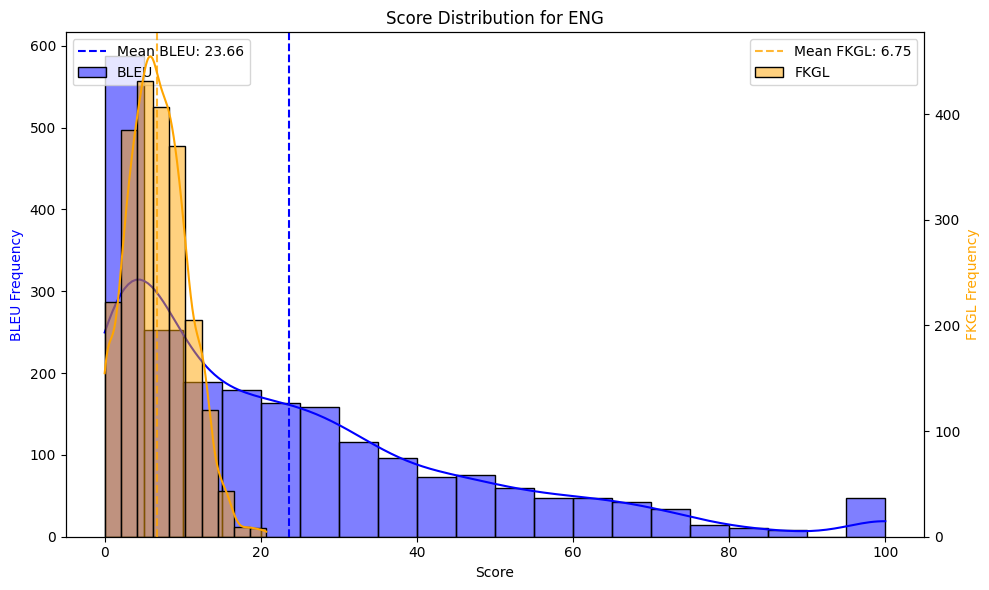

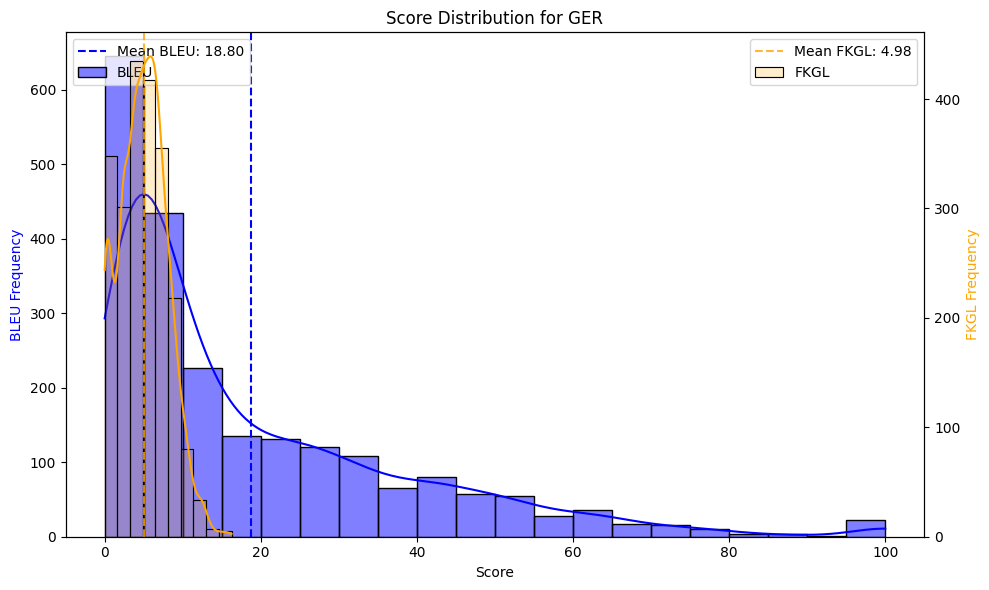

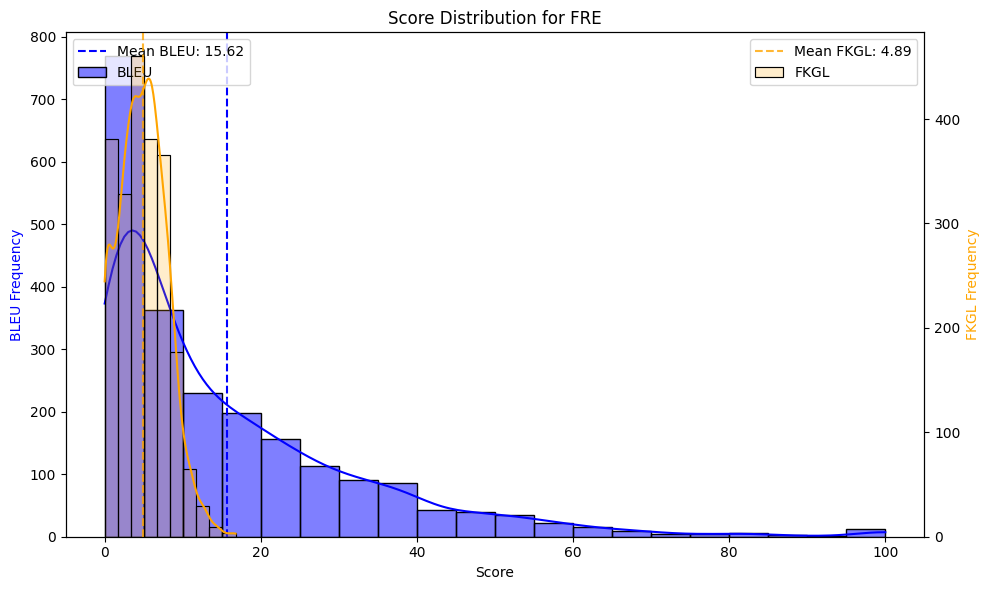

In [369]:
# Print BLEU and FKGL in one graph per language

for l in languages:
    
    language_df = final_df[final_df["language"] == l]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.histplot(language_df["BLEU"], kde=True, color="blue", ax=ax1, label='BLEU', bins=20)

    bleu_mean = language_df["BLEU"].mean()
    ax1.axvline(bleu_mean, color="blue", linestyle="--", label=f"Mean BLEU: {bleu_mean:.2f}")

    ax2 = ax1.twinx()

    if l != 'eng':
        sns.histplot(language_df["FKGL"], kde=True, color="orange", ax=ax2, label='FKGL', bins=10, alpha=0.2)
    else:
        sns.histplot(language_df["FKGL"], kde=True, color="orange", ax=ax2, label='FKGL', bins=10)


    
    # Show the mean for FKGL
    fkgl_mean = language_df["FKGL"].mean()
    ax2.axvline(fkgl_mean, color="orange", linestyle="--", label=f"Mean FKGL: {fkgl_mean:.2f}", alpha=0.8 if l not in ['fr', 'de'] else 0.3)

    # Set labels and titles
    ax1.set_xlabel('Score')
    ax1.set_ylabel('BLEU Frequency', color='blue')
    ax2.set_ylabel('FKGL Frequency', color='orange')

    plt.title(f'Score Distribution for {l.upper()}')
    
    # Add legends to both axes
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.tight_layout()
    plt.show()

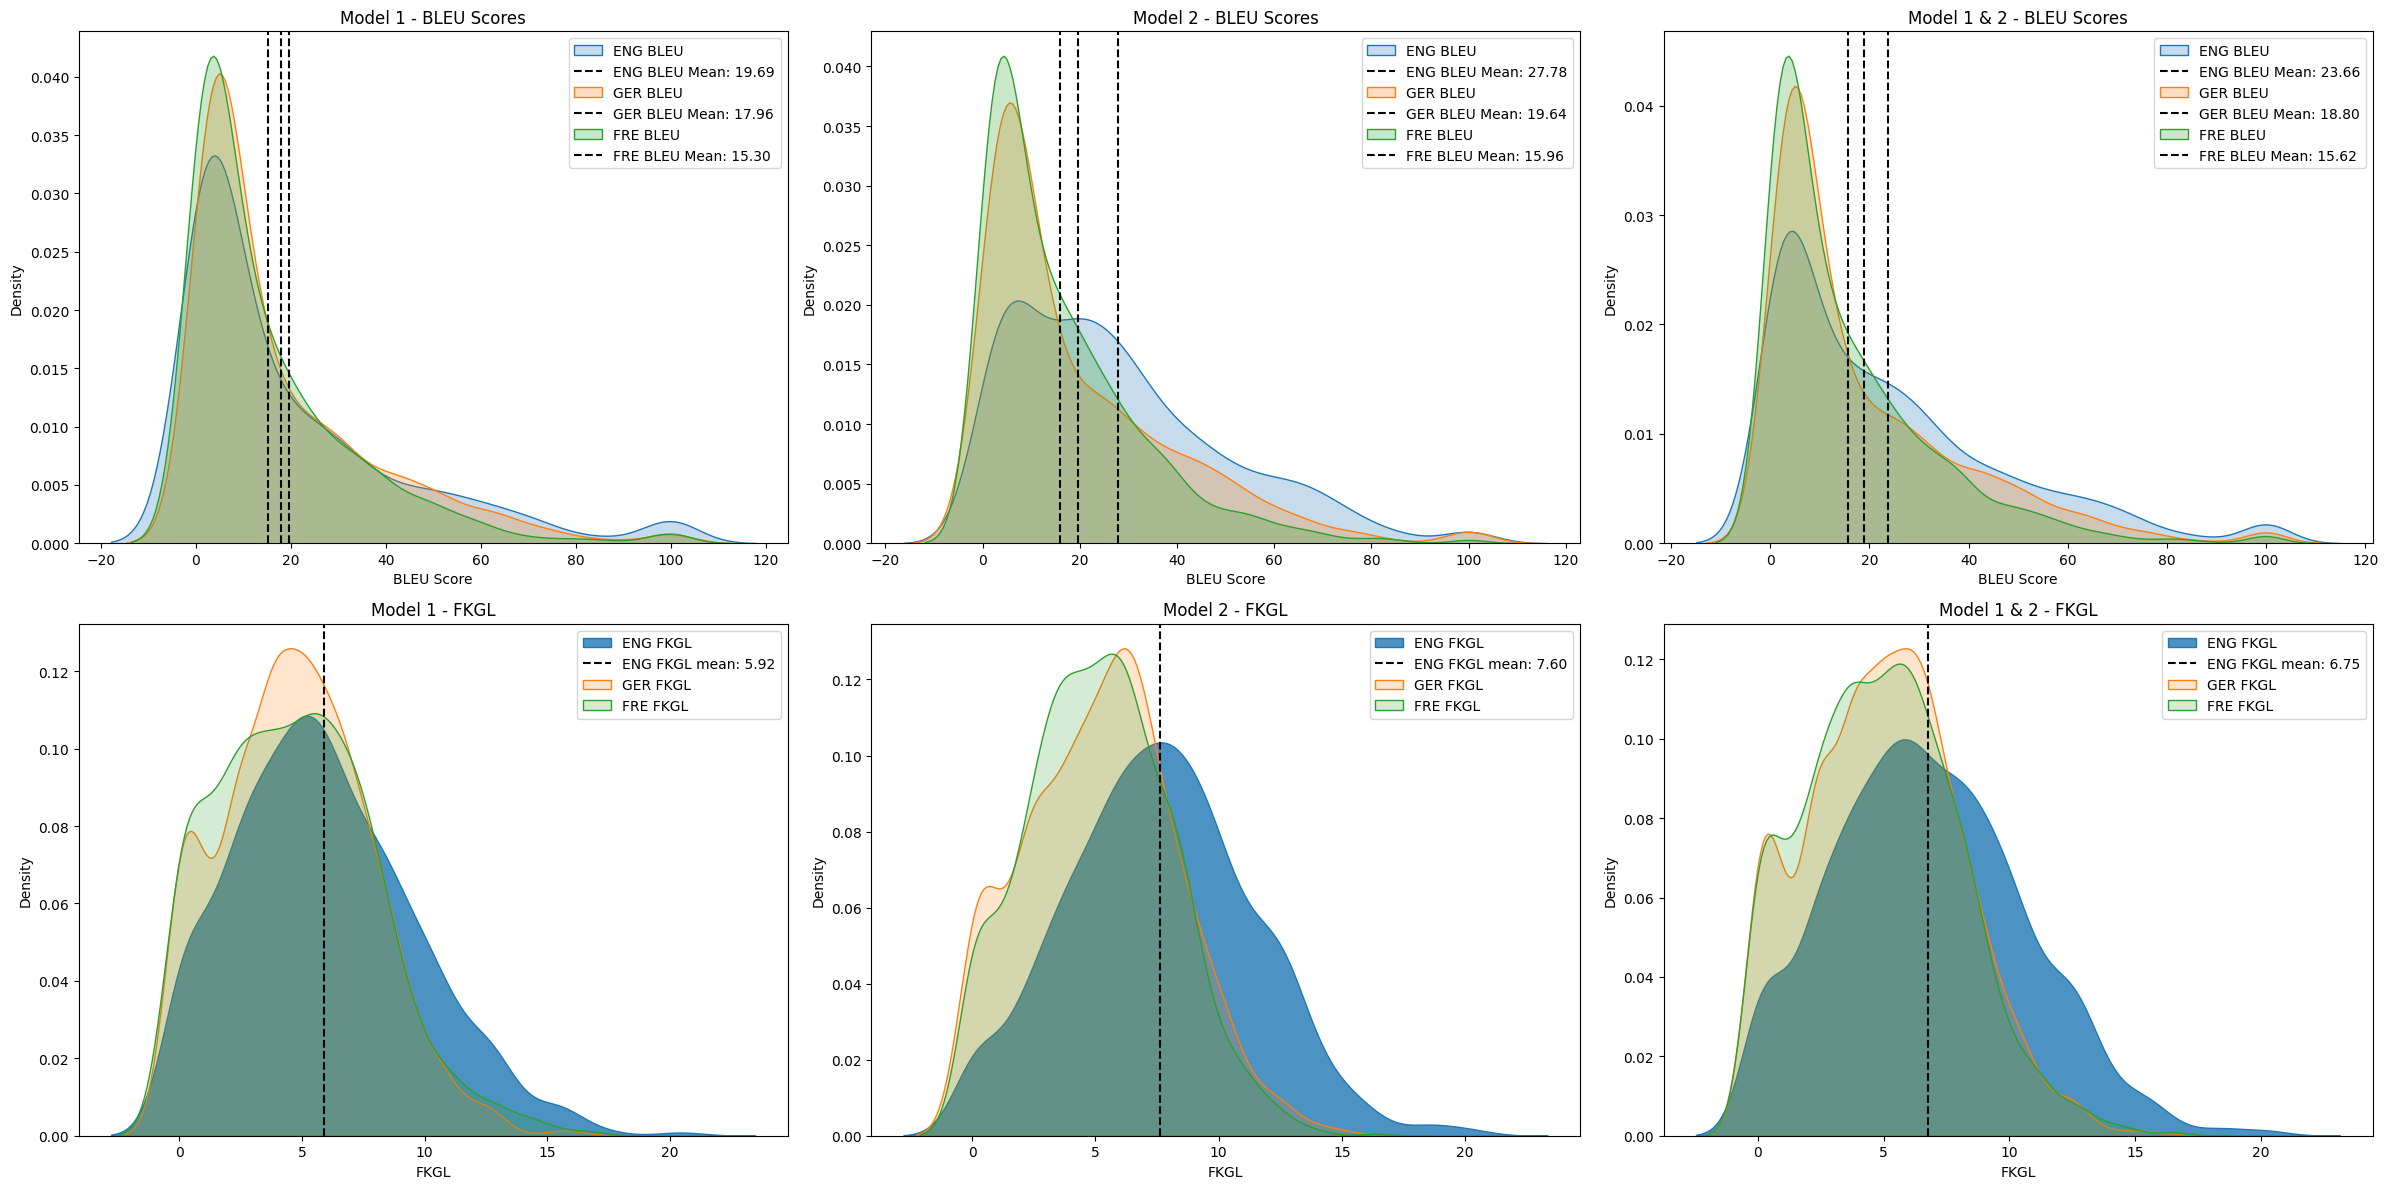

In [393]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the figure size for better visibility
fig, axes = plt.subplots(2, 3, figsize=(24, 12))  # Increased figsize


# Plot BLEU for Model 1 (across all languages) - Top left (0,0)
for l in languages:
    model_1_df = final_df[(final_df["language"] == l) & (final_df["Model"] == models_full[0])]
    sns.kdeplot(model_1_df['BLEU'], fill=True, label=f"{l.upper()} BLEU", ax=axes[0, 0])
    # Add the mean of the BLEU score for Model 1
    mean_bleu = model_1_df['BLEU'].mean()
    axes[0, 0].axvline(mean_bleu, color='black', linestyle='--', label=f"{l.upper()} BLEU Mean: {mean_bleu:.2f}")
axes[0, 0].set_title("Model 1 - BLEU Scores")
axes[0, 0].set_xlabel("BLEU Score")
axes[0, 0].set_ylabel("Density")
axes[0, 0].legend()

# Plot BLEU for Model 2 (across all languages) - Top middle (0,1)
for l in languages:
    model_2_df = final_df[(final_df["language"] == l) & (final_df["Model"] == models_full[1])]
    sns.kdeplot(model_2_df['BLEU'], fill=True, label=f"{l.upper()} BLEU", ax=axes[0, 1])
    # Add the mean of the BLEU score for Model 2
    mean_bleu = model_2_df['BLEU'].mean()
    axes[0, 1].axvline(mean_bleu, color='black', linestyle='--', label=f"{l.upper()} BLEU Mean: {mean_bleu:.2f}")
axes[0, 1].set_title("Model 2 - BLEU Scores")
axes[0, 1].set_xlabel("BLEU Score")
axes[0, 1].set_ylabel("Density")
axes[0, 1].legend()

# Plot BLEU for both models combined (across all languages) - Top right (0,2)
for l in languages:
    combined_df = final_df[final_df["language"] == l]
    sns.kdeplot(combined_df['BLEU'], fill=True, label=f"{l.upper()} BLEU", ax=axes[0, 2])
    # Add the mean of the combined BLEU score
    mean_bleu = combined_df['BLEU'].mean()
    axes[0, 2].axvline(mean_bleu, color='black', linestyle='--', label=f"{l.upper()} BLEU Mean: {mean_bleu:.2f}")
axes[0, 2].set_title("Model 1 & 2 - BLEU Scores")
axes[0, 2].set_xlabel("BLEU Score")
axes[0, 2].set_ylabel("Density")
axes[0, 2].legend()



# Plot FKGL for Model 1 (across all languages) - Bottom left (1,0)
for l in languages:
    model_1_df = final_df[(final_df["language"] == l) & (final_df["Model"] == models_full[0])]
    alpha_val = 0.2 if l in ['fre', 'ger'] else 0.8  # Set lower alpha for 'fr' and 'de'
    sns.kdeplot(model_1_df['FKGL'], fill=True, label=f"{l.upper()} FKGL", ax=axes[1, 0], alpha=alpha_val)
    # Add the mean of the FKGL score for Model 
    if l == 'eng':
        mean_fkgl = model_1_df['FKGL'].mean()
        axes[1, 0].axvline(mean_fkgl, color='black', linestyle='--', label=f"{l.upper()} FKGL mean: {mean_fkgl:.2f}")
axes[1, 0].set_title("Model 1 - FKGL")
axes[1, 0].set_xlabel("FKGL")
axes[1, 0].set_ylabel("Density")
axes[1, 0].legend()

# Plot FKGL for Model 2 (across all languages) - Bottom middle (1,1)
for l in languages:
    model_2_df = final_df[(final_df["language"] == l) & (final_df["Model"] == models_full[1])]
    alpha_val = 0.2 if l in ['fre', 'ger'] else 0.8  # Set lower alpha for 'fr' and 'de'
    sns.kdeplot(model_2_df['FKGL'], fill=True, label=f"{l.upper()} FKGL", ax=axes[1, 1], alpha=alpha_val)
    # Add the mean of the FKGL score for Model 2
    if l == 'eng':
        mean_fkgl = model_2_df['FKGL'].mean()
        axes[1, 1].axvline(mean_fkgl, color='black', linestyle='--', label=f"{l.upper()} FKGL mean: {mean_fkgl:.2f}")
axes[1, 1].set_title("Model 2 - FKGL")
axes[1, 1].set_xlabel("FKGL")
axes[1, 1].set_ylabel("Density")
axes[1, 1].legend()

# Plot FKGL for both models combined (across all languages) - Bottom right (1,2)
for l in languages:
    combined_df = final_df[final_df["language"] == l]
    alpha_val = 0.2 if l in ['fre', 'ger'] else 0.8  # Set lower alpha for 'fr' and 'de'
    sns.kdeplot(combined_df['FKGL'], fill=True, label=f"{l.upper()} FKGL", ax=axes[1, 2], alpha=alpha_val)
    # Add the mean of the combined FKGL score
    if l == 'eng':
        mean_fkgl = combined_df['FKGL'].mean()
        axes[1, 2].axvline(mean_fkgl, color='black', linestyle='--', label=f"{l.upper()} FKGL mean: {mean_fkgl:.2f}")
axes[1, 2].set_title("Model 1 & 2 - FKGL")
axes[1, 2].set_xlabel("FKGL")
axes[1, 2].set_ylabel("Density")
axes[1, 2].legend()

# Adjust layout for readability
plt.tight_layout()



# Show the final plot
plt.show()


fig.savefig("BLEU FKGL across langs.png") 


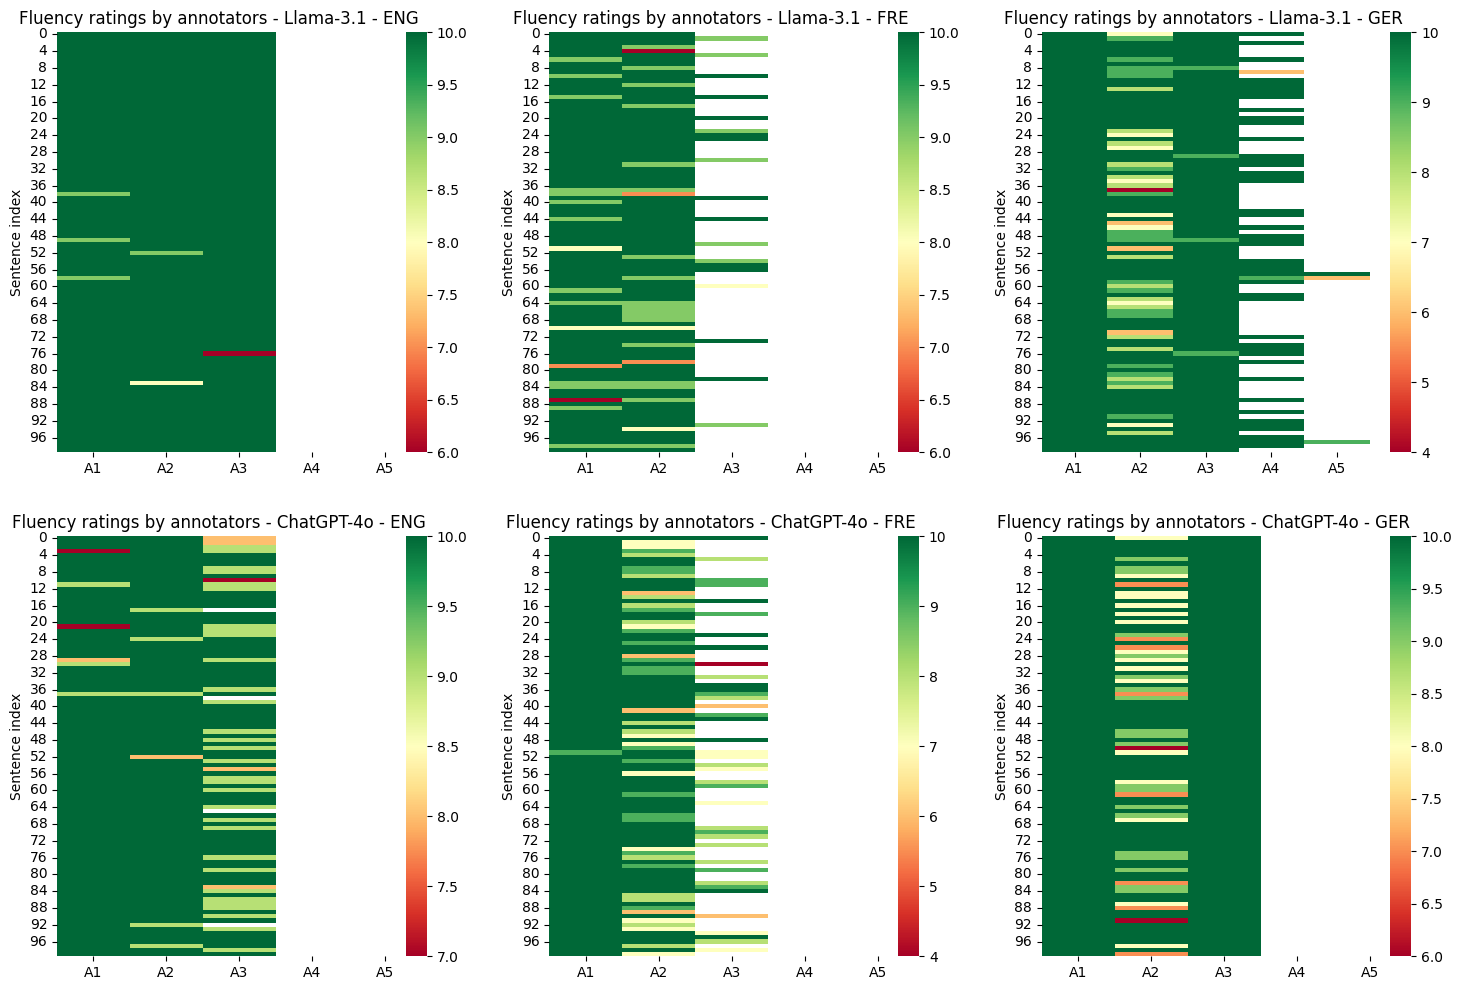

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

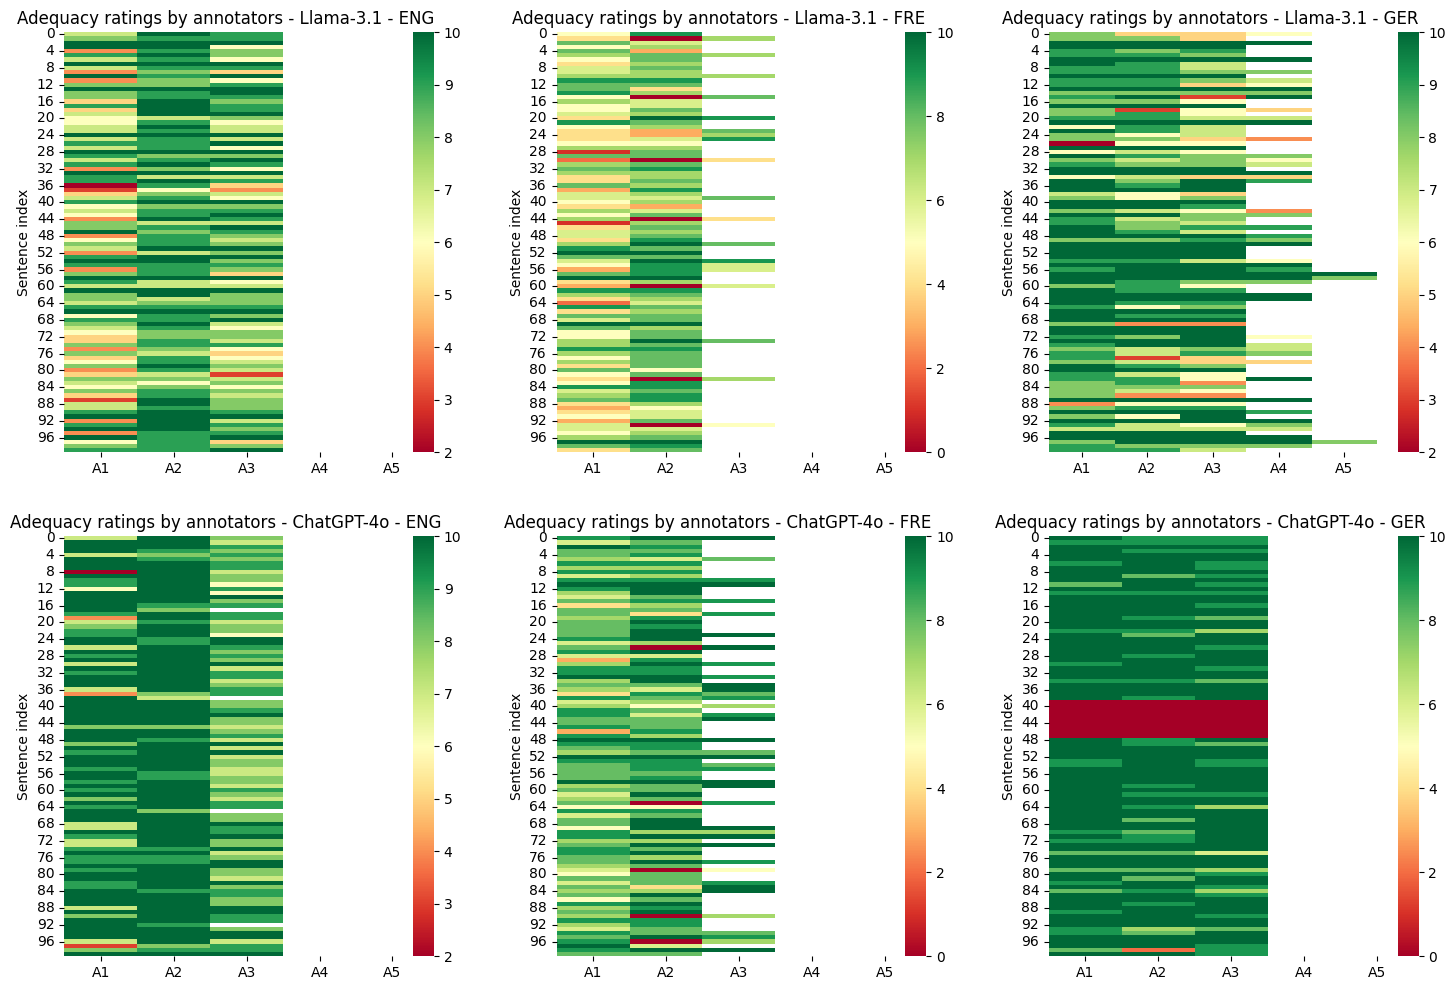

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

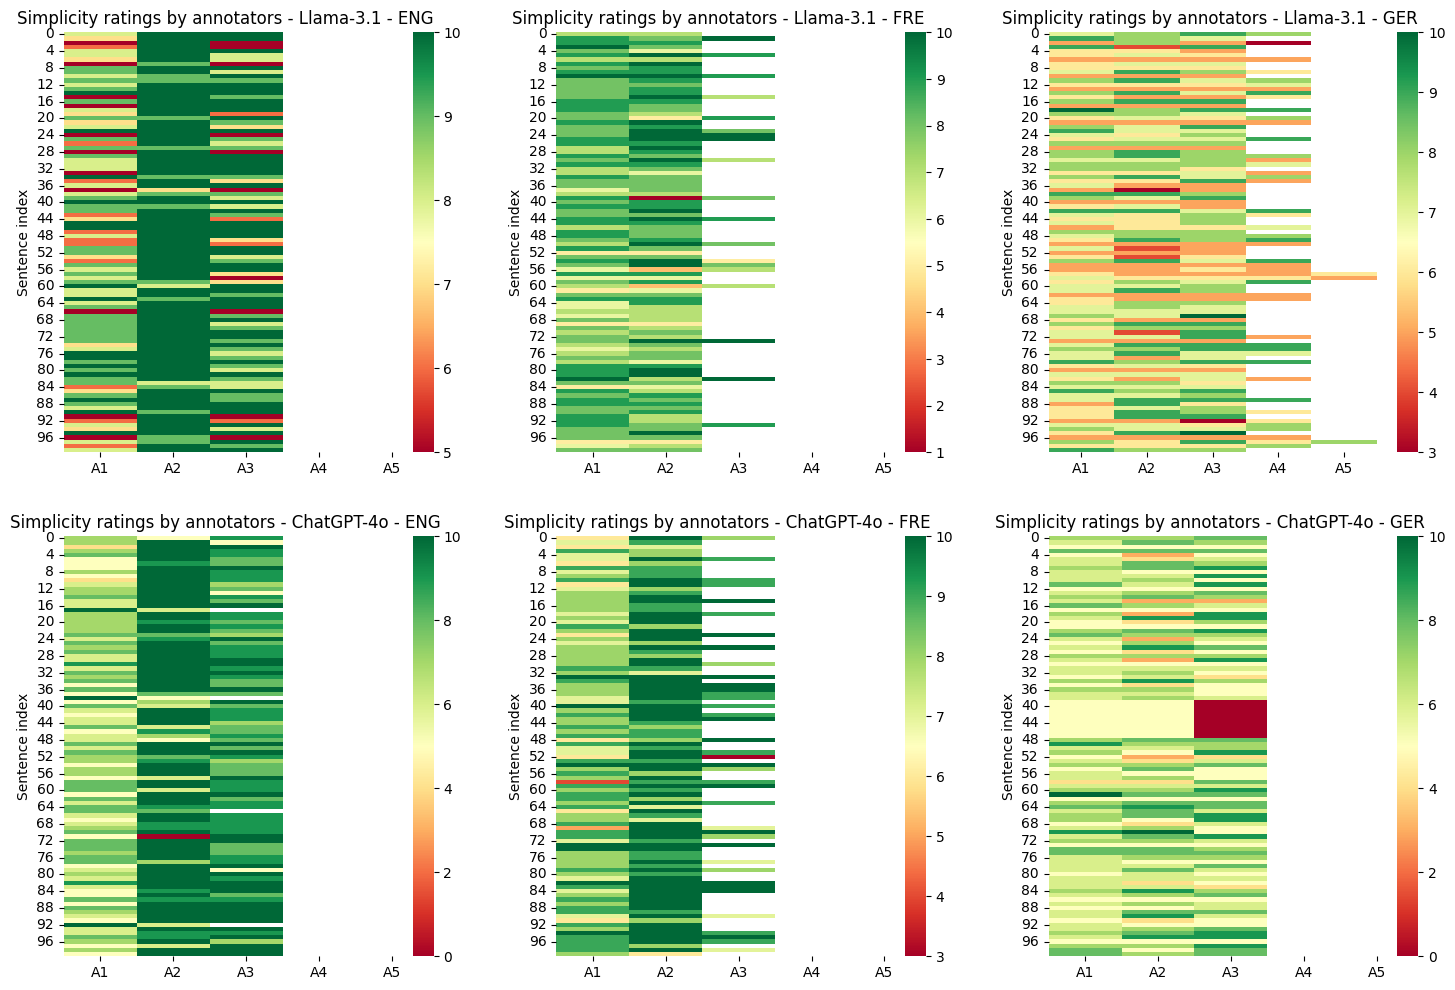

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [459]:
# make rating heatmaps
for dimension in ["fluency", "adequacy", "simplicity"]:

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    for i, language in enumerate(['eng', 'fre', 'ger']):
    
        for j, model in enumerate(models):
    
            filtered_df = final_df_human[(final_df_human["language"] == language) & (final_df_human["Model"].str.startswith(model[0]))].reset_index()
            expanded_df = filtered_df[dimension].apply(lambda x: pd.Series(x))

            ax = axes[j, i]  # j: row index, i: column index
            
            plt.figure(figsize=(12, 8))
            sns.heatmap(expanded_df,
                        annot=False,
                        cmap='RdYlGn', 
                        xticklabels=['A1', 'A2', 'A3', 'A4', 'A5'],
                        ax=ax)
            
            ax.set_title(f'{dimension.capitalize()} ratings by annotators - {model} - {language.upper()} ')
            ax.set_ylabel('Sentence index')
   
    #plt.tight_layout()
    figname = f'{dimension.capitalize()} ratings by annotators heatmap.png'
    fig.savefig("figures/"+figname)
    plt.show()

eng
fre
ger


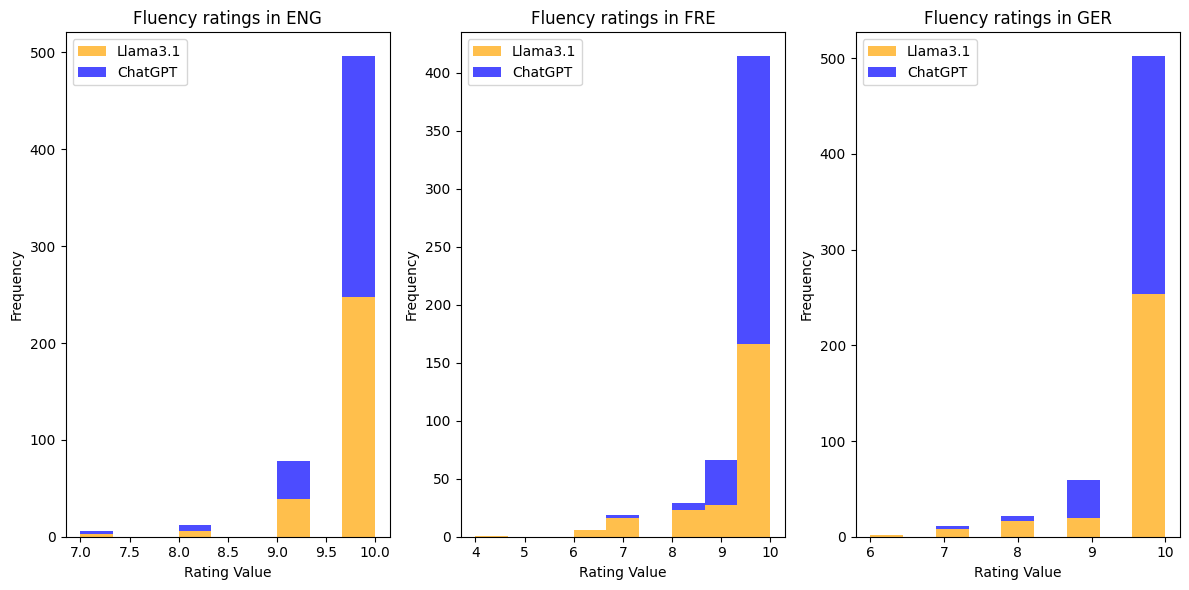

eng
fre
ger


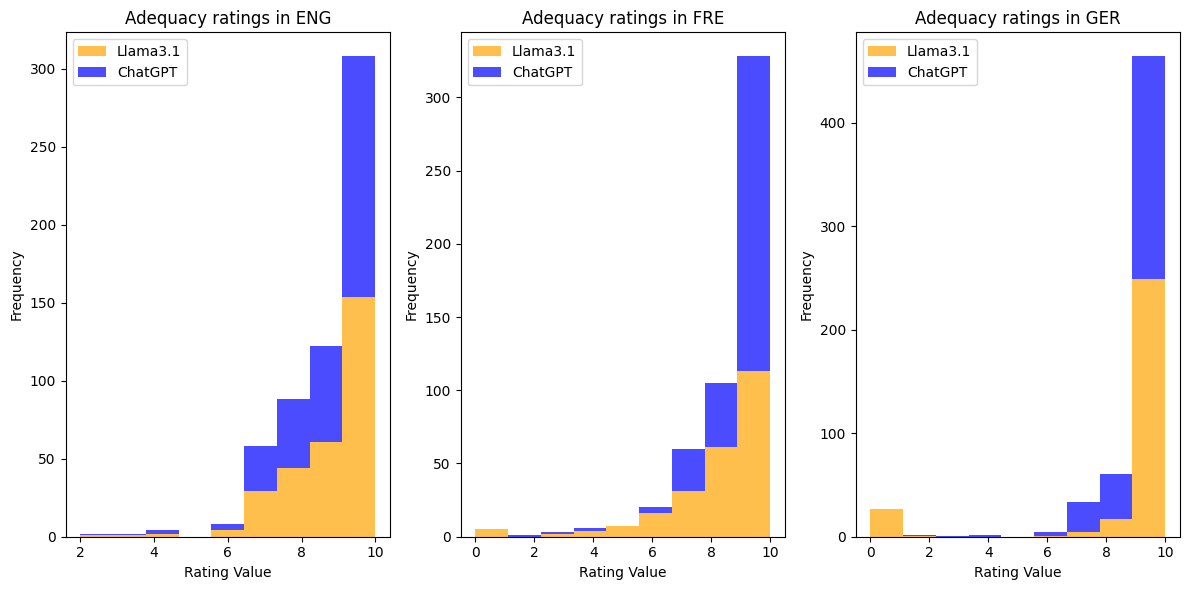

eng
fre
ger


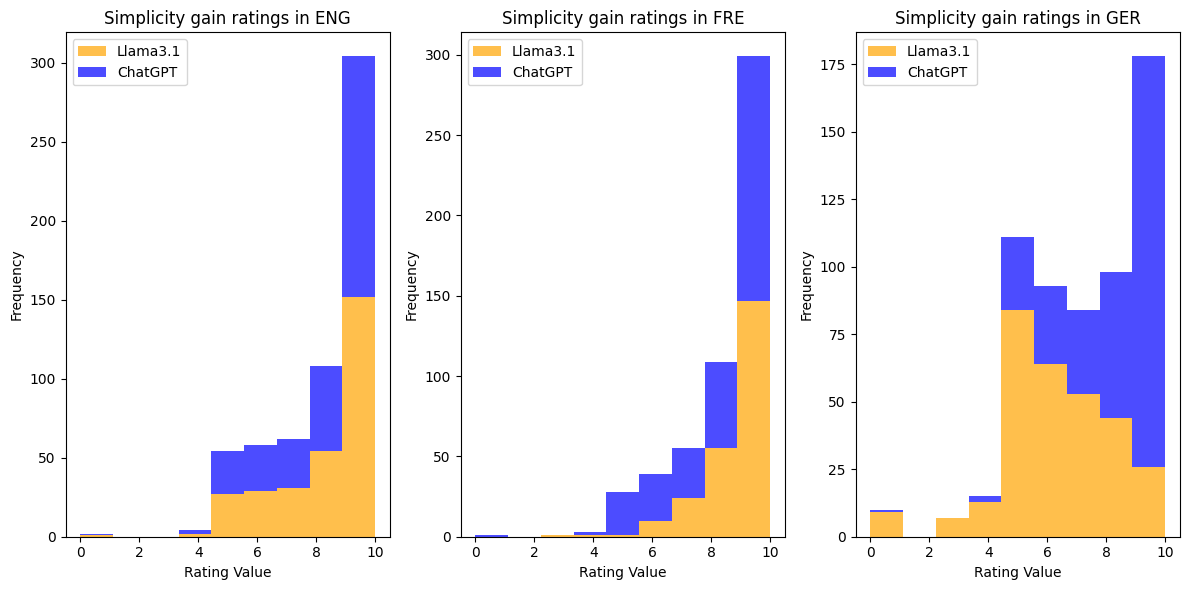

In [533]:
# Plotting

for dimension in quality_dimensions:

    fig = plt.figure(figsize=(12, 6))
    
    for i, language in enumerate(languages):
            print(language)
    
            plt.subplot(1, 3, i+1)
            filtered_df1 = argilla_df[  (argilla_df["language"] == language)  & 
                                        (argilla_df["model"].str.startswith("L"))   ]
        
            filtered_df1 = argilla_df[  (argilla_df["language"] == language)  & 
                                        (argilla_df["model"].str.startswith("C"))   ]
    
            
     
            bins = np.linspace(min(filtered_df1[dimension+"_rating"].min(), filtered_df2[dimension+"_rating"].min()),
                           max(filtered_df1[dimension+"_rating"].max(), filtered_df2[dimension+"_rating"].max()), 10)
                
            plt.hist([filtered_df1[dimension+"_rating"], filtered_df2[dimension+"_rating"]], bins=bins, alpha=0.7, 
                             label=["Llama3.1", "ChatGPT"], color=['orange', 'blue'], stacked=True)

            if dimension == 'simplicity':
                plt.title("Simplicity gain ratings in "+language.upper())
            else:
                plt.title(dimension.capitalize() + " ratings in "+language.upper())

            plt.xlabel('Rating Value')
            plt.ylabel('Frequency')
            plt.legend()
    
    plt.tight_layout()
    plt.show()
    fig.savefig("figures/"+dimension+ " ratings stacked bar plot.png")

In [717]:
final_df_human.to_json('final_df_human.json', orient='records', lines=True)



KRIPPENDORFF ALPHA:  0.037614654311806106
for  fluency annotations in eng
KRIPPENDORFF ALPHA:  0.12061990698889691
for  adequacy annotations in eng
KRIPPENDORFF ALPHA:  0.3101002311610529
for  simplicity annotations in eng


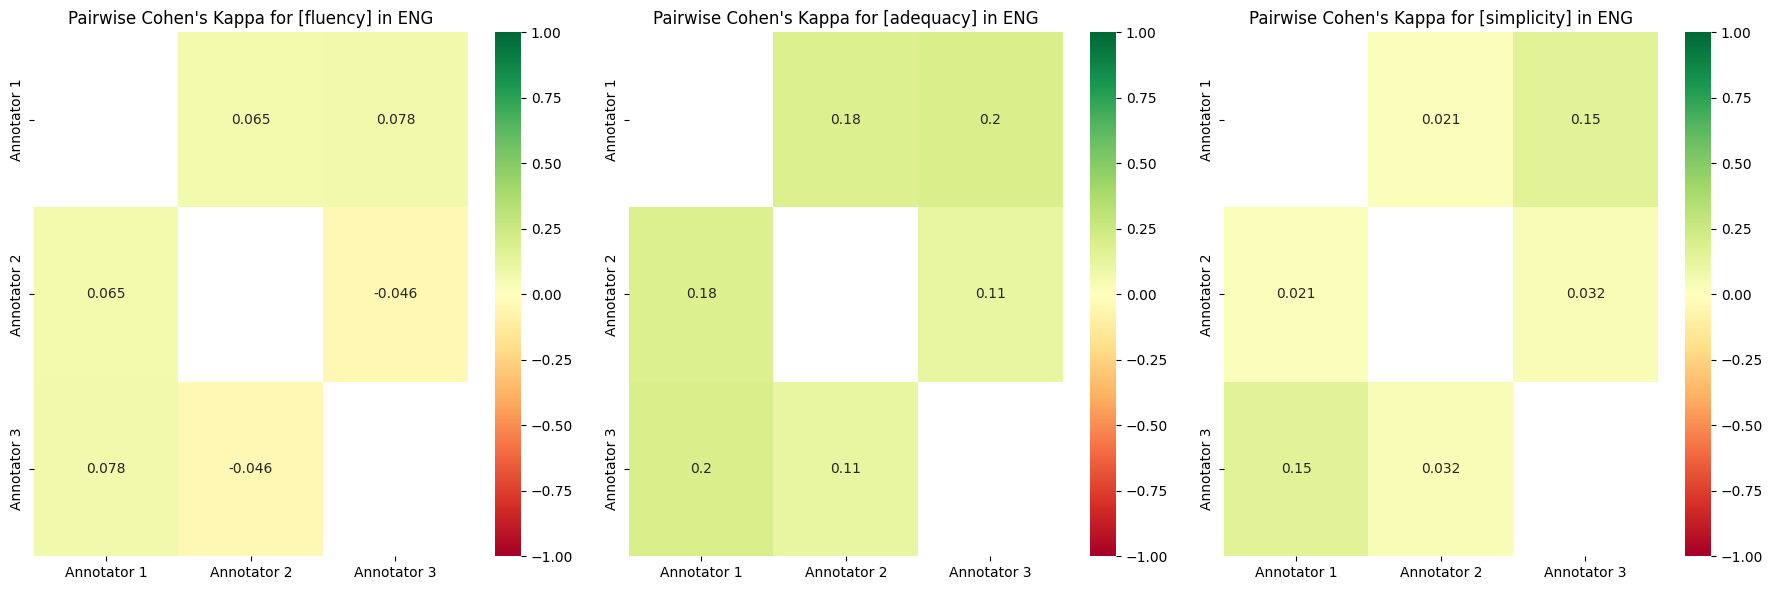

KRIPPENDORFF ALPHA:  0.0782632706866695
for  fluency annotations in fre
KRIPPENDORFF ALPHA:  0.021484582125886664
for  adequacy annotations in fre
KRIPPENDORFF ALPHA:  0.06817688678152234
for  simplicity annotations in fre


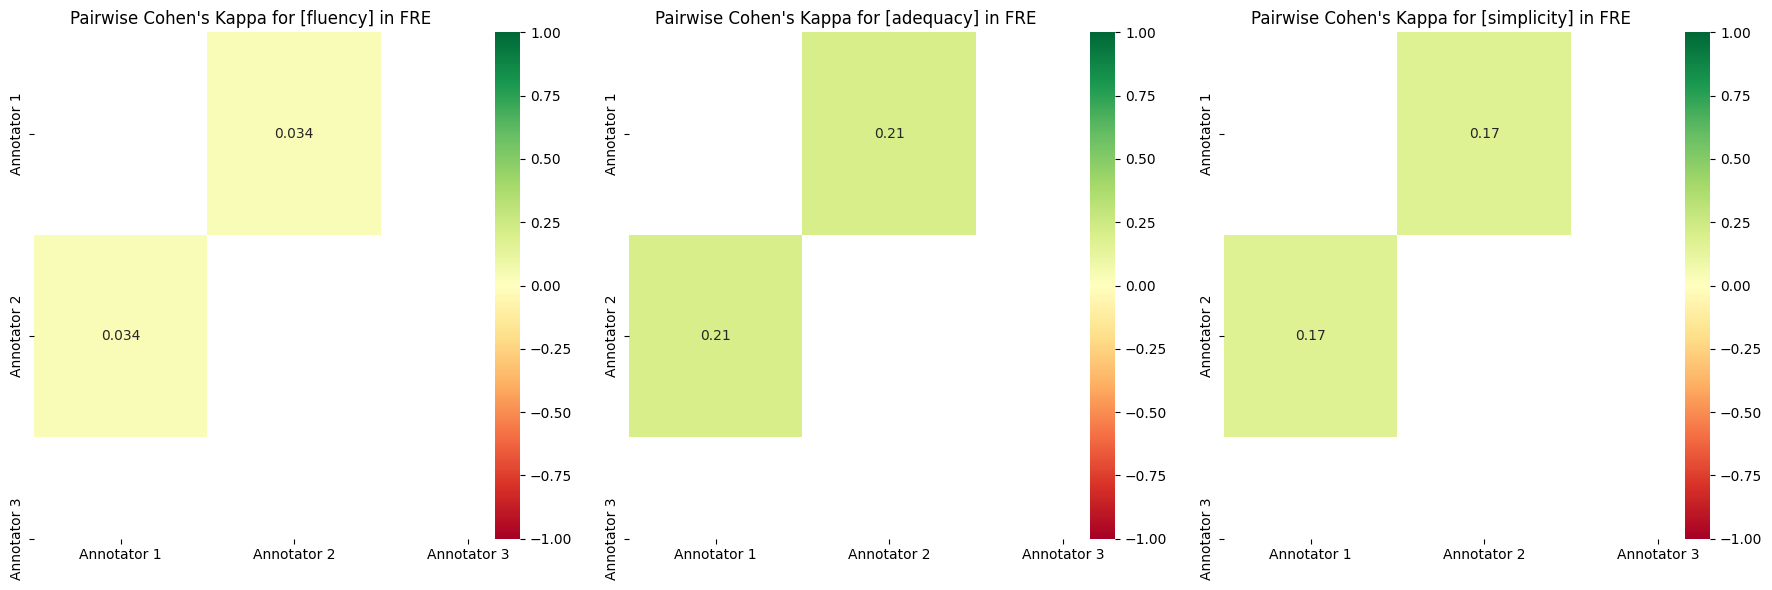

KRIPPENDORFF ALPHA:  0.2618846389003917
for  fluency annotations in ger
KRIPPENDORFF ALPHA:  0.005416047984476036
for  adequacy annotations in ger
KRIPPENDORFF ALPHA:  -0.002878606534941097
for  simplicity annotations in ger


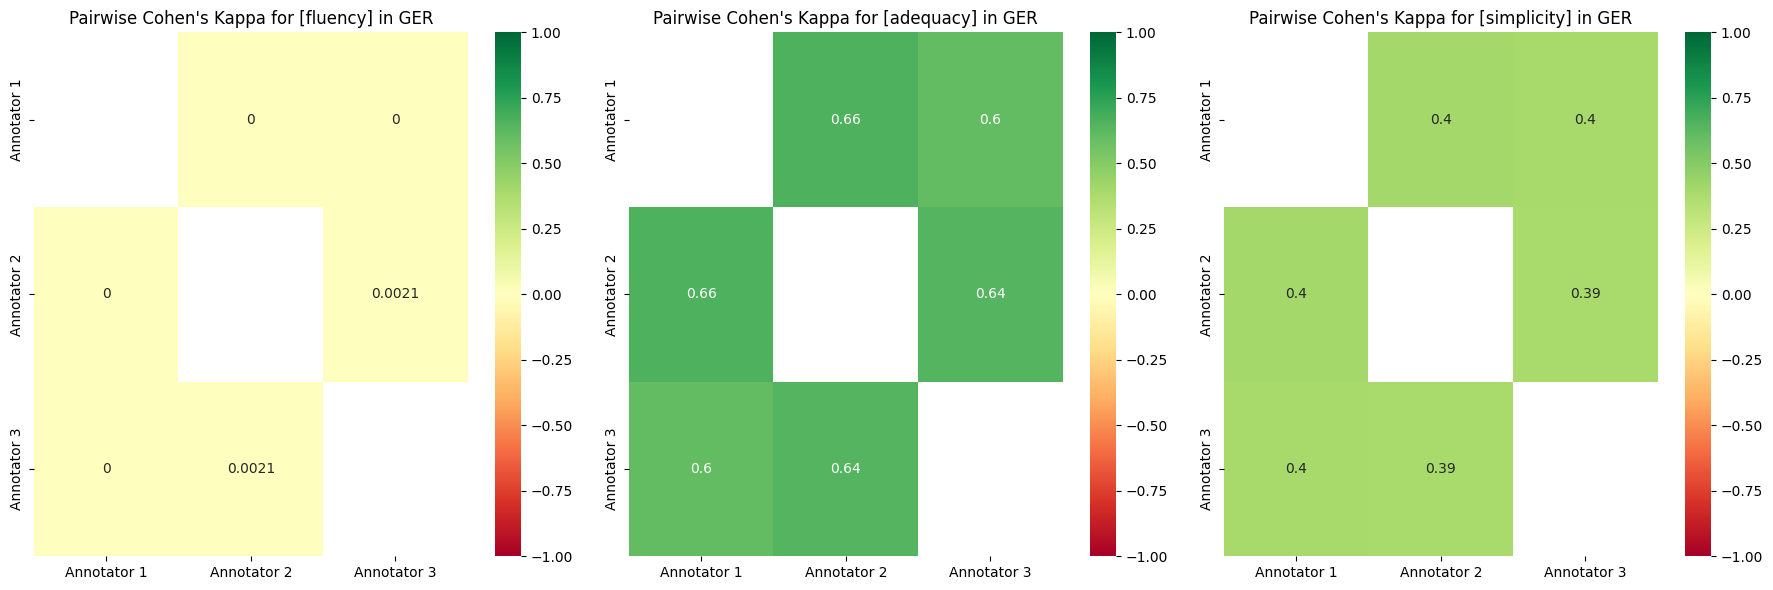

[0.037614654311806106,
 0.12061990698889691,
 0.3101002311610529,
 0.0782632706866695,
 0.021484582125886664,
 0.06817688678152234,
 0.2618846389003917,
 0.005416047984476036,
 -0.002878606534941097]

In [657]:
# Inter-annotator agreement

#final_df_human = pd.read_json('final_df_human.json', orient='records', lines=True)


IAA = 'krippendorff'     # krippendorff as single score, cohen's kappa for pairwise agreement
binning = False                # default off  # 0-4 become 1, 5-7 become 2, 8-10 become 3
normalize = True               # default on   # get rid of instances where ratings are missing and truncating lines with too many raings

def pairwise_kappa(matrix):
    kappa_matrix = np.full((matrix.shape[1], matrix.shape[1]), np.nan)
    for i in range(matrix.shape[1]):
        for j in range(i + 1, matrix.shape[1]):
            valid_idx = ~np.isnan(matrix[:, i]) & ~np.isnan(matrix[:, j])
            if np.sum(valid_idx) > 1:  # Only compute if there is enough overlap
                kappa_matrix[i, j] = cohen_kappa_score(matrix[valid_idx, i], matrix[valid_idx, j], weights='linear')
                kappa_matrix[j, i] = kappa_matrix[i, j]
    return kappa_matrix

# Mapping function
def map_rating(rating):
    if 0 <= rating <= 5:
        return 1
    elif 6 <= rating <= 8:
        return 2
    elif 9 <= rating <= 10:
        return 3


scores = []
for language in languages:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 subplots in 1 row, wide figure for side-by-side display

    for i, dimension in enumerate(quality_dimensions):

        filtered_df = final_df_human[final_df_human["language"] == language]
        rating_list = filtered_df[dimension].to_list()
        
        if binning:
            rating_list = [[map_rating(rating) for rating in sublist] for sublist in rating_list]
        
        if normalize:
            if language == 'fre':
                rating_list = [sublist[:2] for sublist in rating_list if len(sublist) > 1]
            else:
                rating_list = [sublist[:3] for sublist in rating_list if len(sublist) > 2]
        
        max_length = max(len(row) for row in rating_list)
        padded_data = [row + [None] * (max_length - len(row)) for row in rating_list]
        data_array = np.array(padded_data, dtype=np.float64)
        #pprint(data_array)

        
        if IAA == 'krippendorff':
            alpha = krippendorff.alpha(reliability_data=data_array)
            scores.append(alpha)
            print("KRIPPENDORFF ALPHA: ", alpha)
            print("for ", dimension, "annotations in", language)
        elif IAA == 'fleiss':
            possible_ratings = range(0, 11)

            fleiss_data = np.array([
                [np.sum(row == rating) for rating in possible_ratings]
                for row in data_array
            ])

            # Step 3: Calculate Fleiss' Kappa
            fleiss = fleiss_kappa(fleiss_data, method='fleiss')
            scores.append(fleiss)
            print("FLEISS KAPPA: ", fleiss)
            print("for ", dimension, "annotations in", language)

        # Generate the cohen kappa matrix and plot it
        kappa_matrix = pairwise_kappa(data_array)

        # Plot each dimension on a separate subplot (axes[i])
        sns.heatmap(
            kappa_matrix, annot=True, cmap='RdYlGn', cbar=True,
            xticklabels=['Annotator 1', 'Annotator 2', 'Annotator 3'],
            yticklabels=['Annotator 1', 'Annotator 2', 'Annotator 3'],
            vmin=-1, vmax=1, ax=axes[i]
        )
        
        # Title each subplot with the specific dimension
        axes[i].set_title(f"Pairwise Cohen's Kappa for [{dimension}] in {language.upper()}")

    # Adjust layout to fit subplots nicely
    plt.tight_layout()
    plt.savefig(f"figures/IAA_for_{language.upper()}.png", format='png', dpi=300, bbox_inches='tight')
    plt.show()

        
"""plt.figure(figsize=(8, 6))
sns.heatmap(kappa_matrix, annot=True, cmap='RdYlGn', cbar=True,
            xticklabels=['Annotator 1', 'Annotator 2', 'Annotator 3'],
            yticklabels=['Annotator 1', 'Annotator 2', 'Annotator 3'],
            vmin=-1, vmax=1)
plt.title("Pairwise Cohen's Kappa for ["+dimension+"] in "+language.upper())

plt.savefig("figures/IAA_for_"+dimension+"_in_"+language.upper()+".png", format='png', dpi=300, bbox_inches='tight')

plt.show()"""


scores

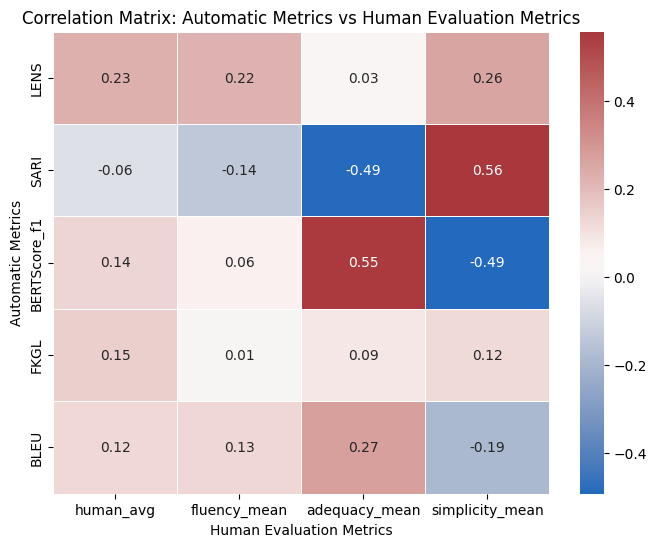

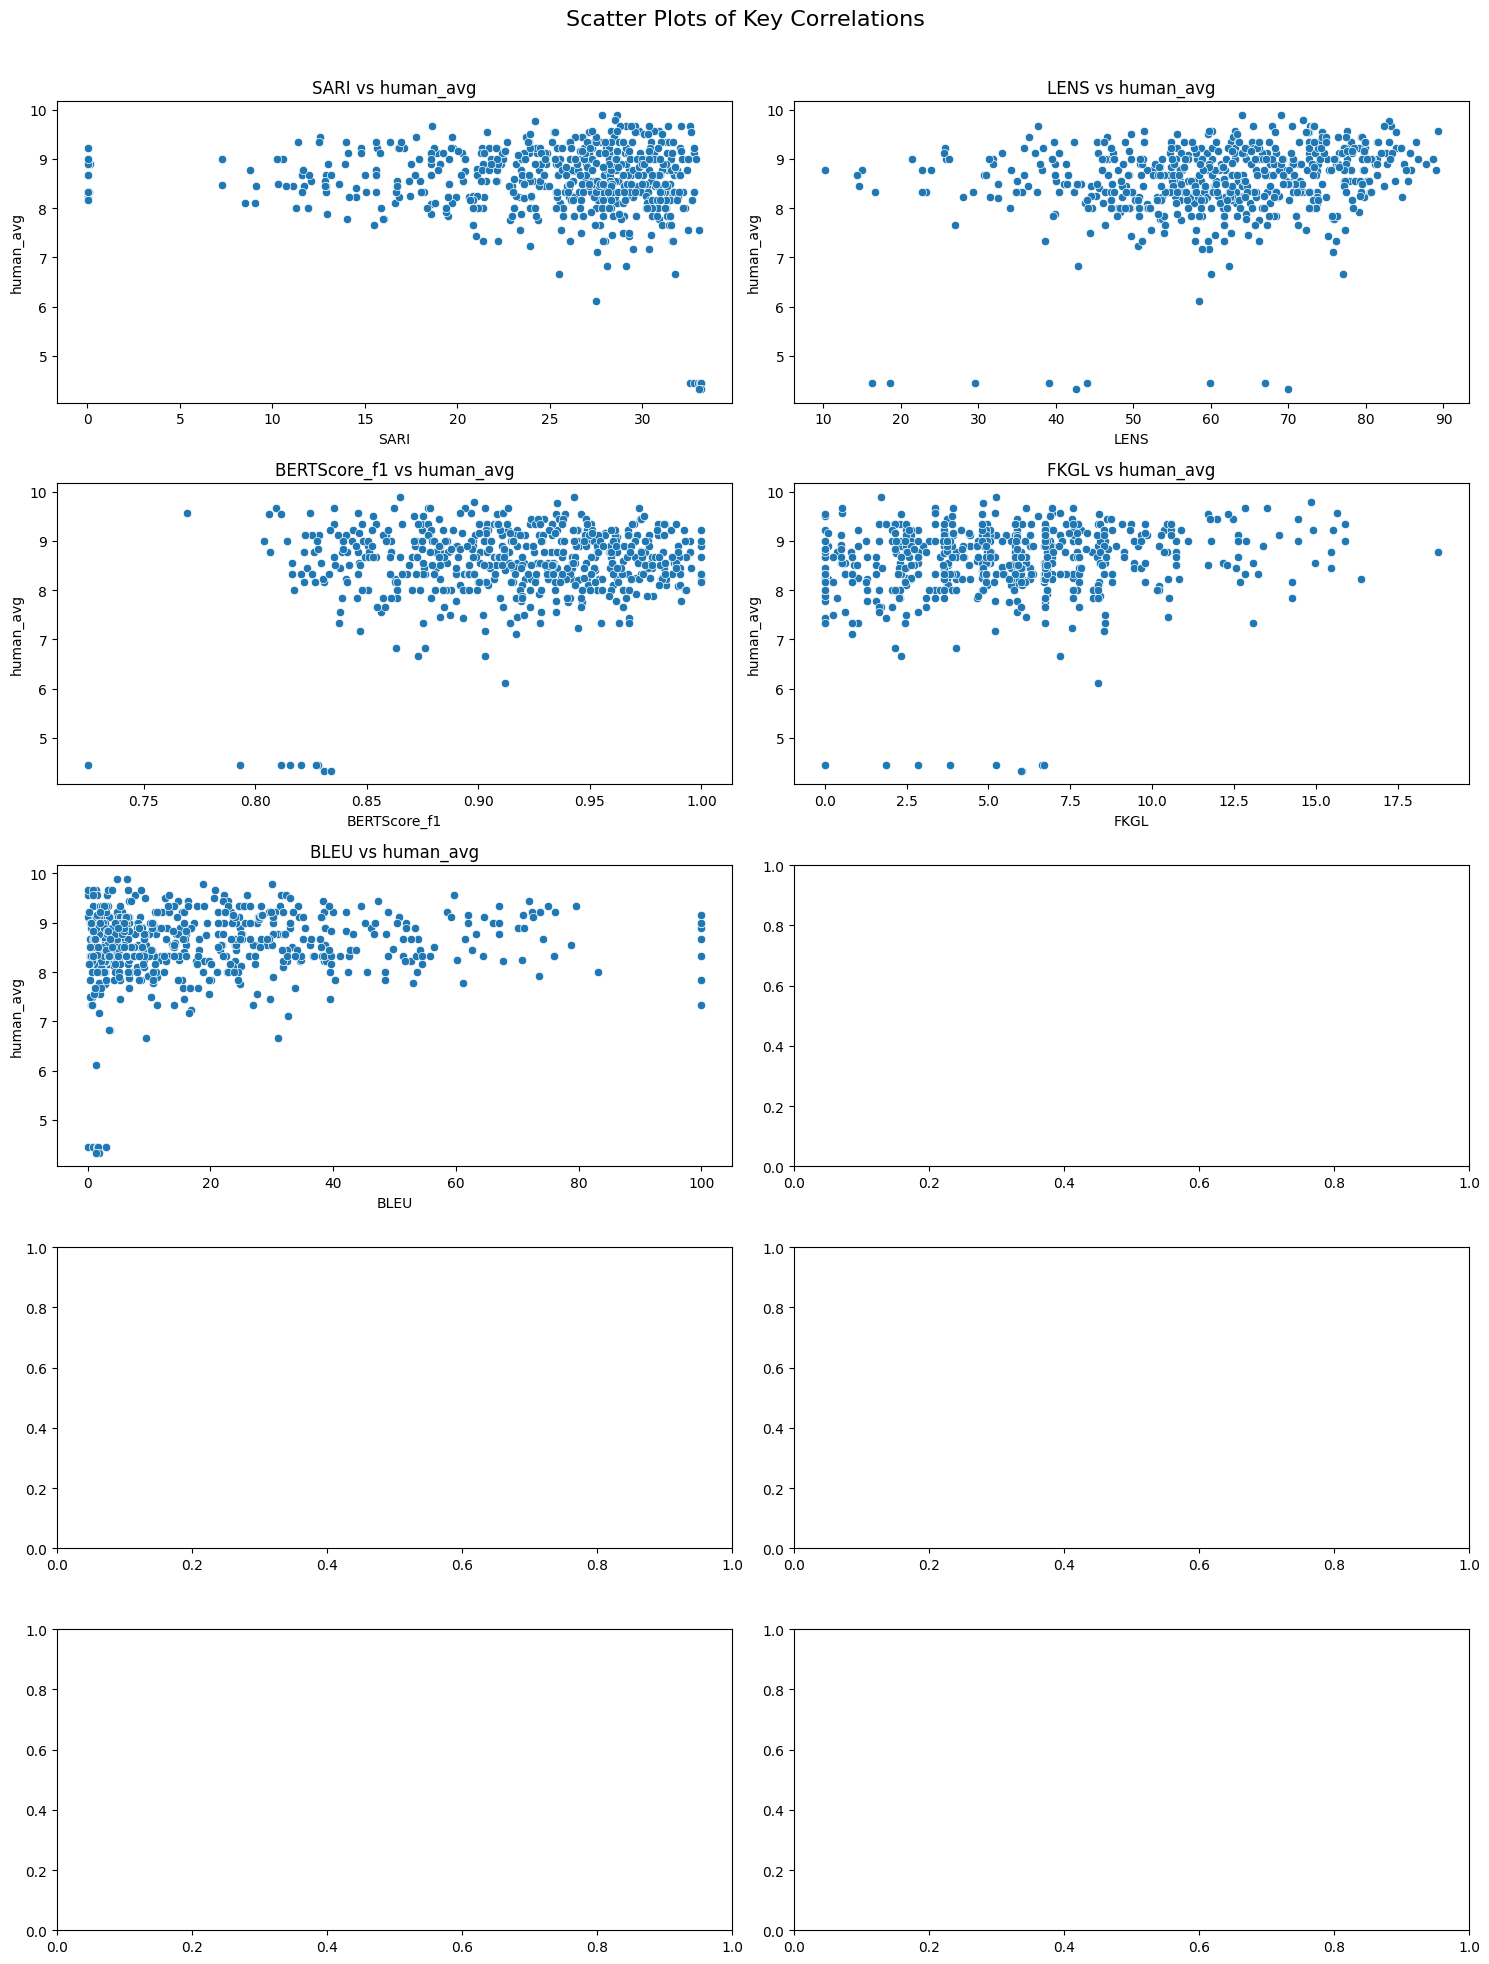

                        Pair  Correlation
0          SARI vs human_avg       -0.059
1          LENS vs human_avg        0.231
2  BERTScore_f1 vs human_avg        0.136
3          FKGL vs human_avg        0.150
4          BLEU vs human_avg        0.124


In [673]:
"""correlation_pairs = {
    'SARI': 'simplicity',
    'LENS': 'simplicity',
    'BERTScore_f1': 'adequacy',
    'LENS': 'adequacy',
    'FKGL': 'fluency',
    'LENS': 'human_avg',
    'SARI': 'human_avg',
    'BERTScore_f1': 'human_avg',
    'FKGL': 'human_avg',
    'BLEU': 'human_avg'
}

# Compute correlations for each pair and store in a dictionary
correlation_results = {}
for var1, var2 in correlation_pairs.items():
    correlation_results[f"{var1} vs {var2}"] = final_df_human[var1].corr(final_df_human[var2])

# Display correlations as a DataFrame
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Pair', 'Correlation'])

# Plot a heatmap for selected correlations
selected_columns = list(set(correlation_pairs.keys()).union(set(correlation_pairs.values())))
correlation_matrix = final_df_human[selected_columns].corr()


# Select columns for automatic metrics and human evaluation metrics
automatic_metrics = ['LENS', 'SARI', 'BERTScore_f1', 'FKGL', 'BLEU']
human_eval_metrics = ['human_avg', 'fluency_mean', 'adequacy_mean', 'simplicity_mean']

# Calculate correlations between each pair of automatic metric and human evaluation metric
selected_corr_matrix = final_df_human[automatic_metrics + human_eval_metrics].corr().loc[automatic_metrics, human_eval_metrics]

# Plot the adjusted correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Automatic Metrics vs Human Evaluation Metrics")
plt.xlabel("Human Evaluation Metrics")
plt.ylabel("Automatic Metrics")
plt.show()


# Step 3: Scatter plots for specific pairs
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
fig.suptitle("Scatter Plots of Key Correlations", fontsize=16)

# Plot scatter for each pair
for (var1, var2), ax in zip(correlation_pairs.items(), axes.flatten()):
    sns.scatterplot(x=final_df_human[var1], y=final_df_human[var2], ax=ax)
    ax.set_title(f"{var1} vs {var2}")
    ax.set_xlabel(var1)
    ax.set_ylabel(var2)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Display correlation table
print(correlation_df)"""

In [55]:
final_df_human.columns

Index(['source_index', 'output1', 'Prompt1', 'Model', 'input', 'ref', 'LENS',
       'SARI', 'FKGL', 'BERTScore_precision', 'BERTScore_recall',
       'BERTScore_f1', 'BLEU', 'language', 'fluency', 'adequacy', 'simplicity',
       'hallucinations', 'user', 'FKGL_og_sent', 'FKGL_diff', 'fluency_mean',
       'adequacy_mean', 'simplicity_mean', 'human_avg'],
      dtype='object')

/tmp/ipykernel_60520/2402313667.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_human['human_avg'] = final_df_human[['fluency_mean', 'adequacy_mean', 'simplicity_mean']].mean(axis=1)


language_df for  eng
eng    200
Name: language, dtype: int64


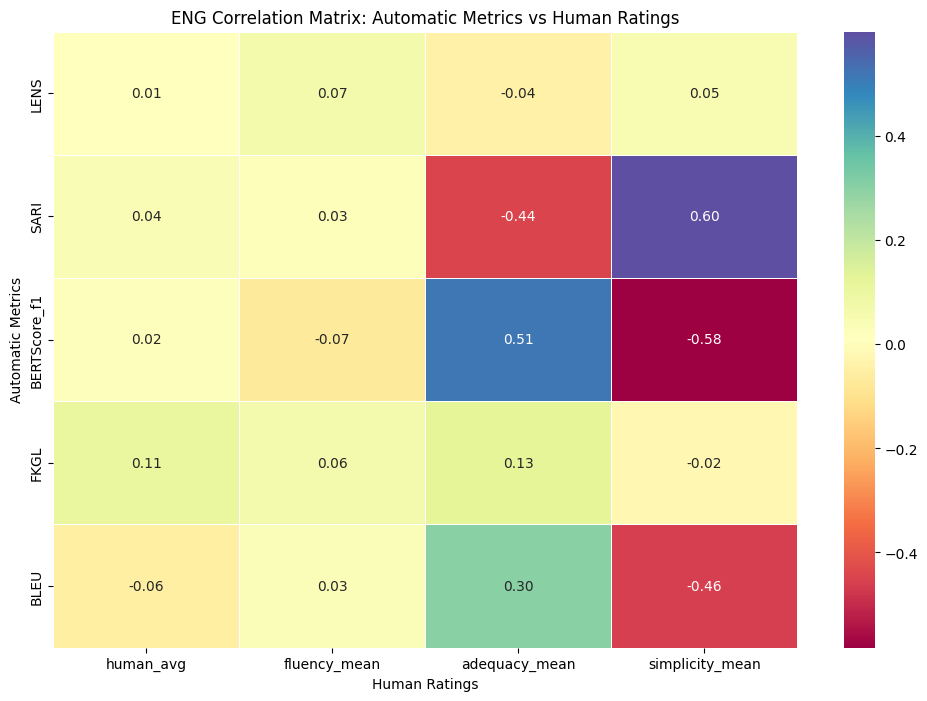

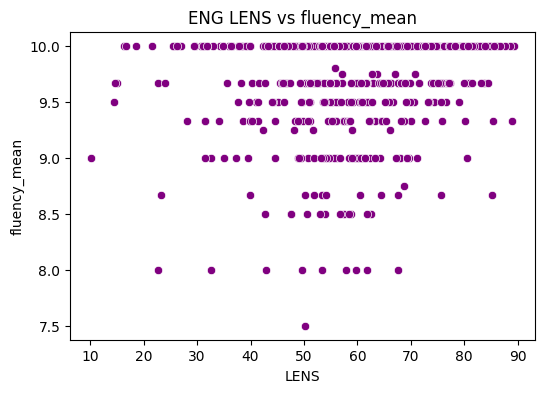

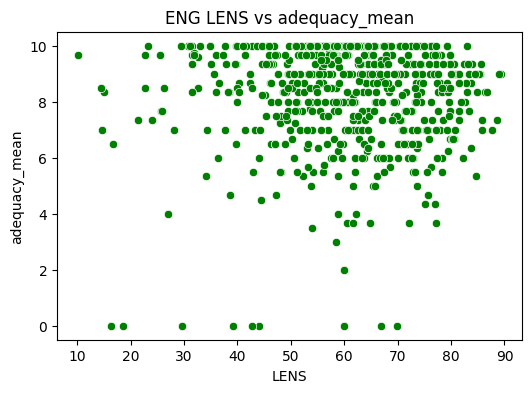

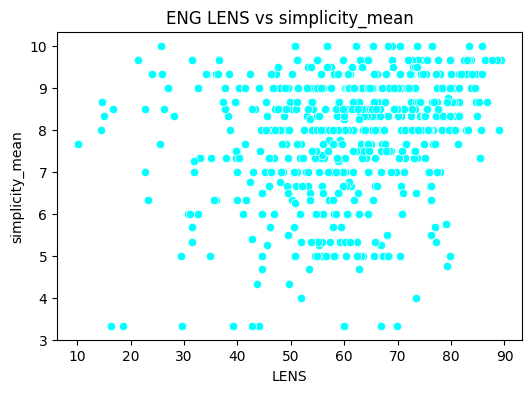

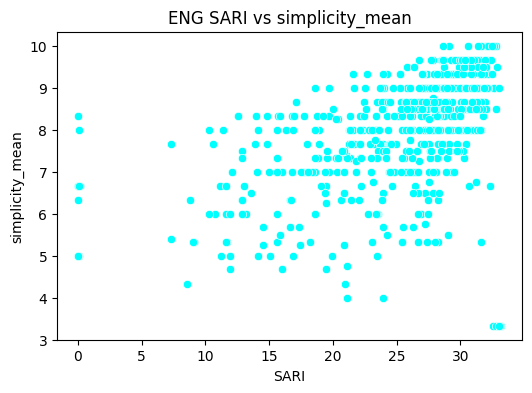

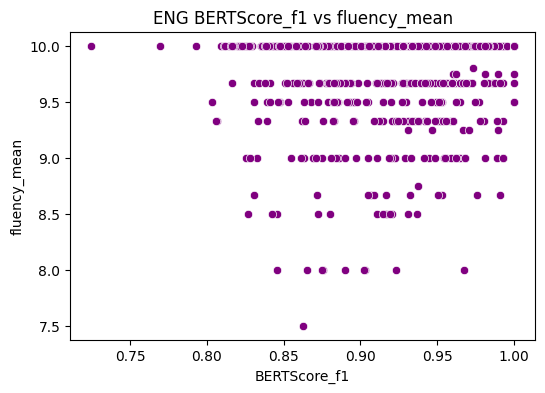

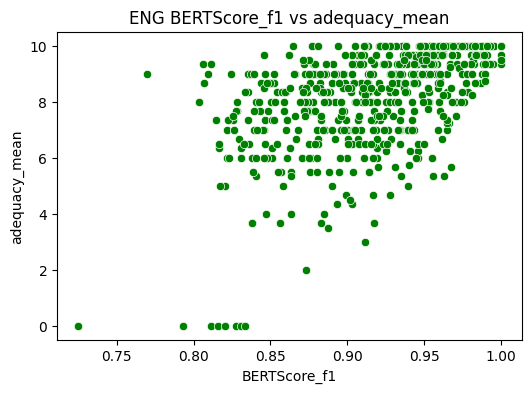

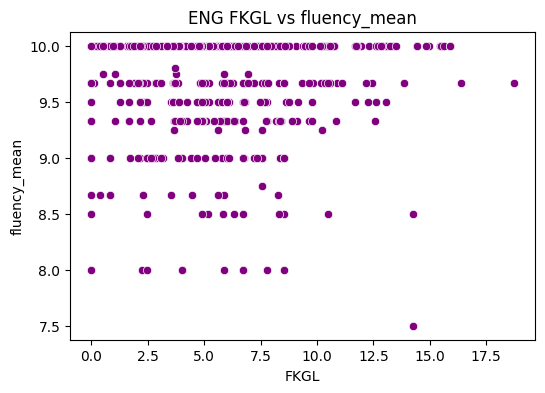

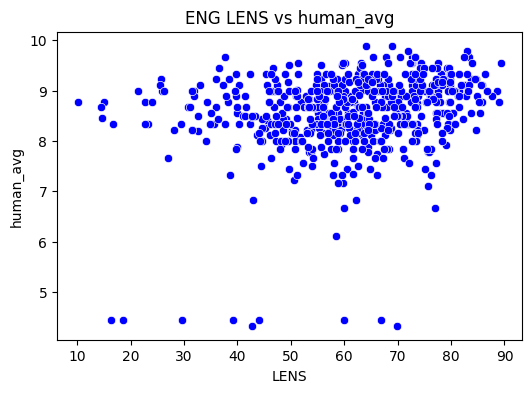

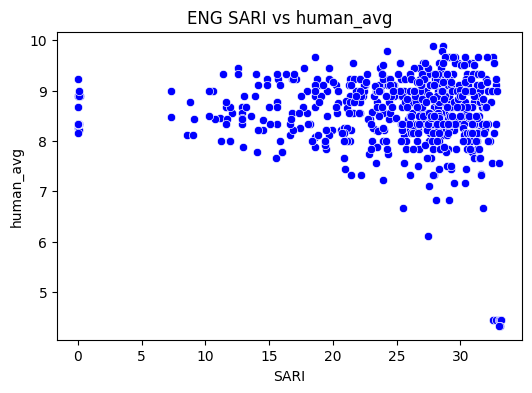

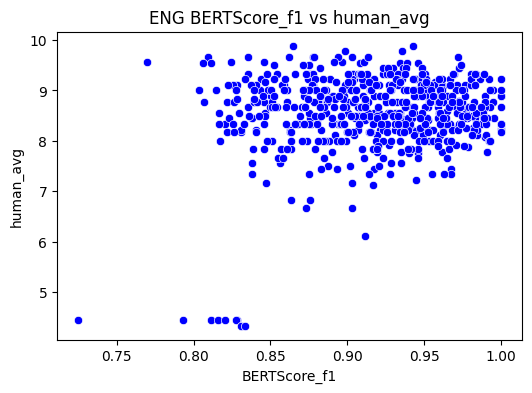

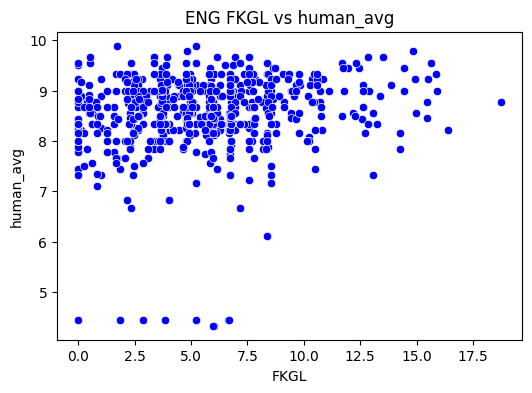

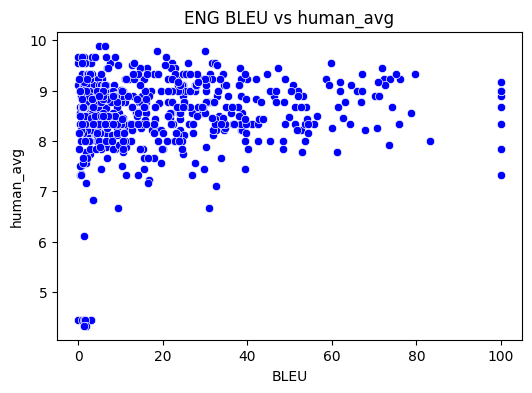

language_df for  fre
fre    200
Name: language, dtype: int64


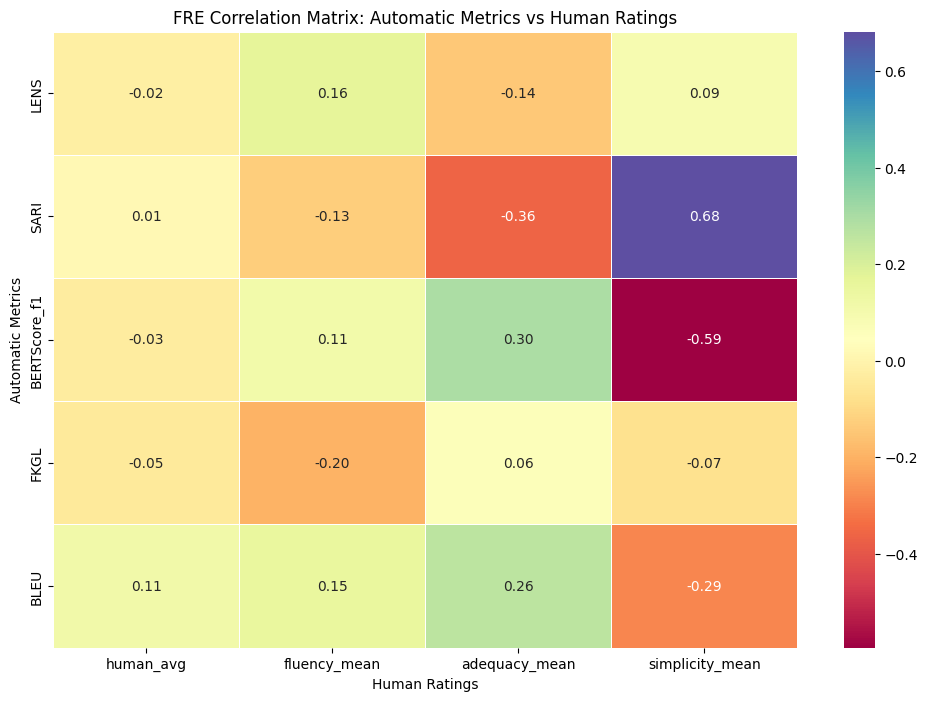

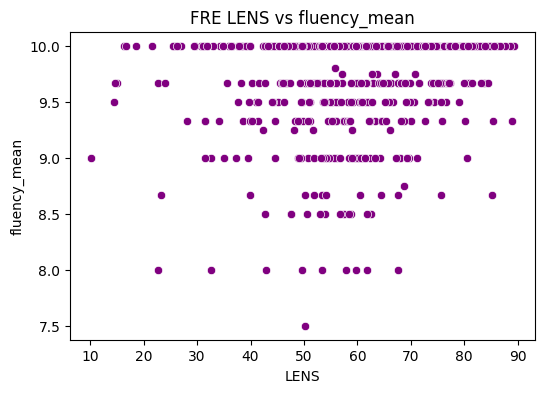

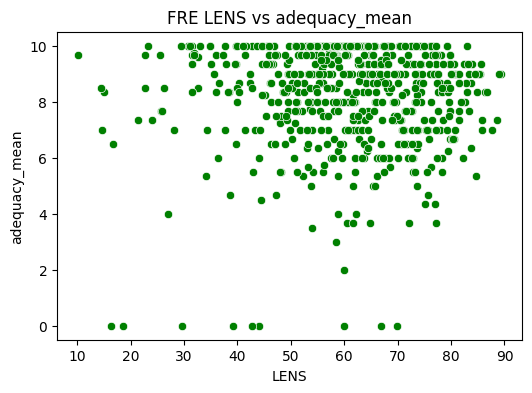

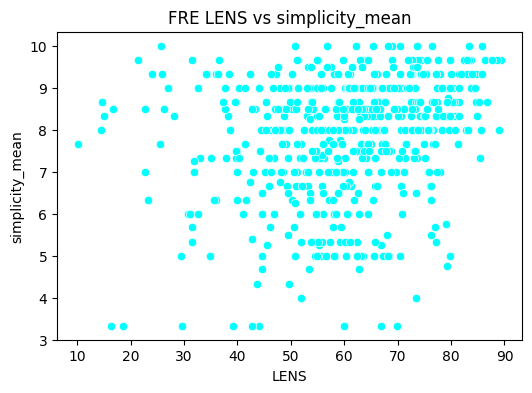

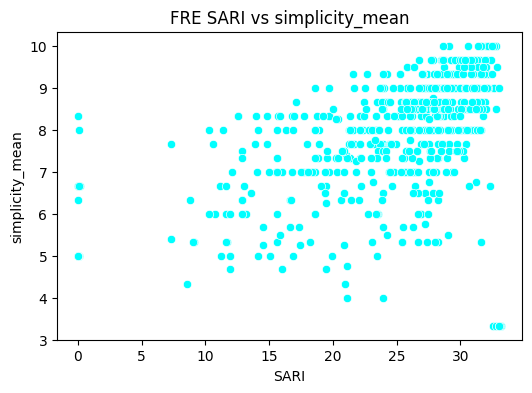

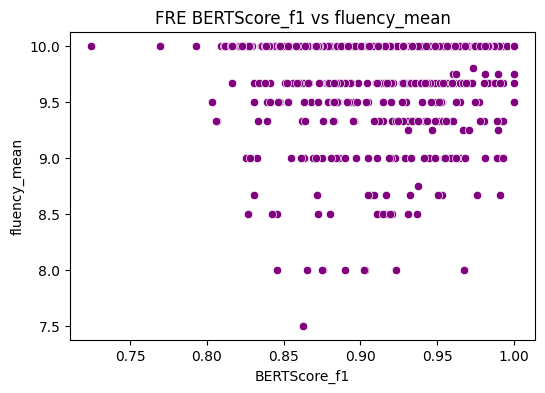

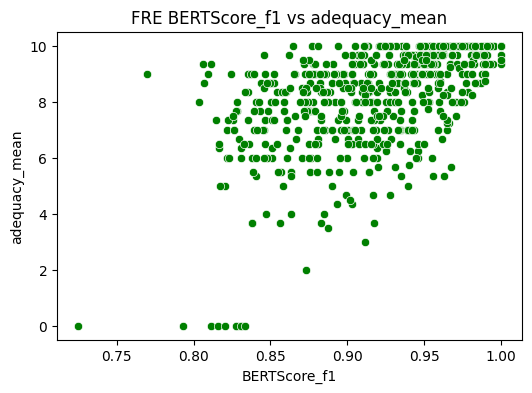

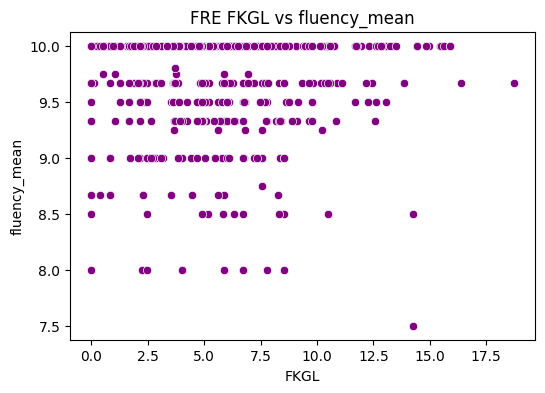

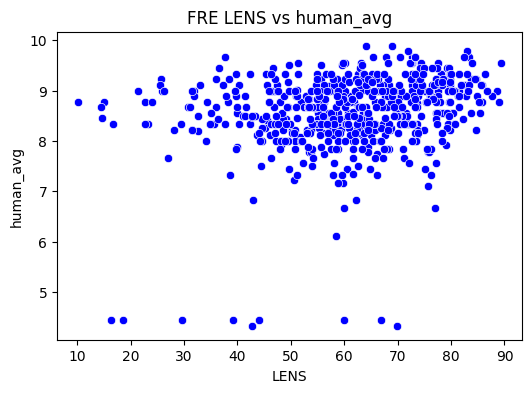

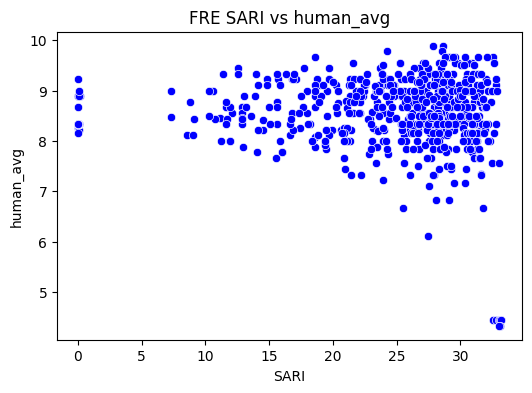

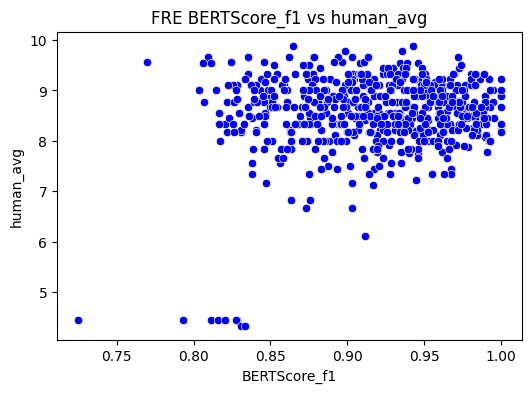

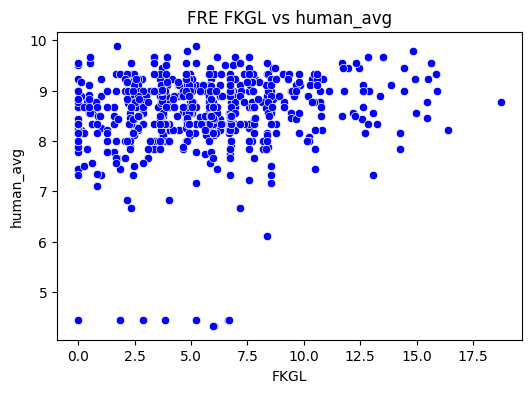

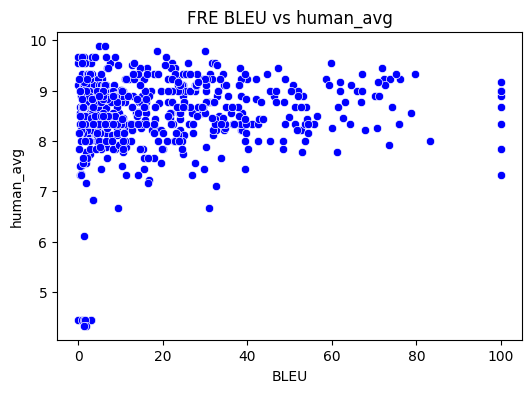

language_df for  ger
ger    200
Name: language, dtype: int64


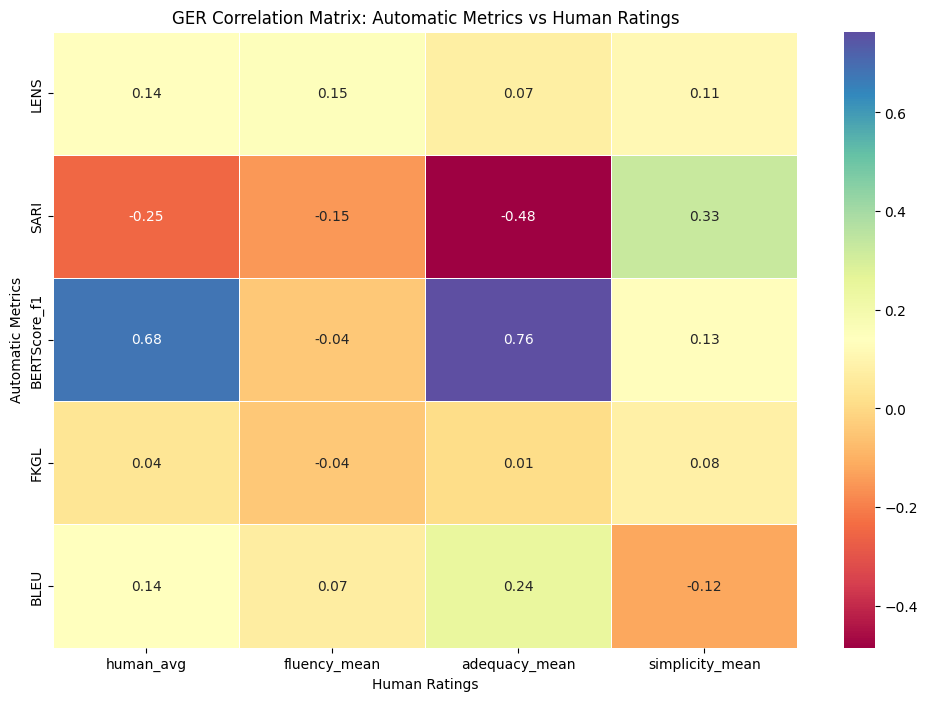

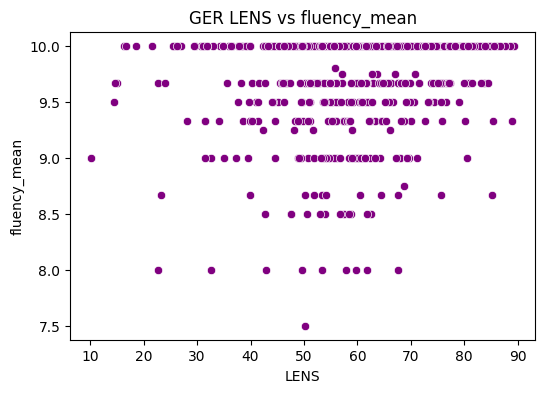

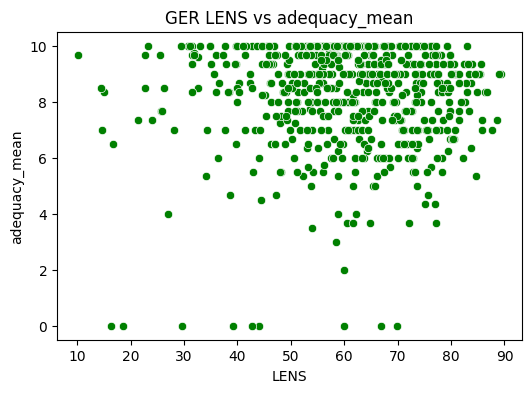

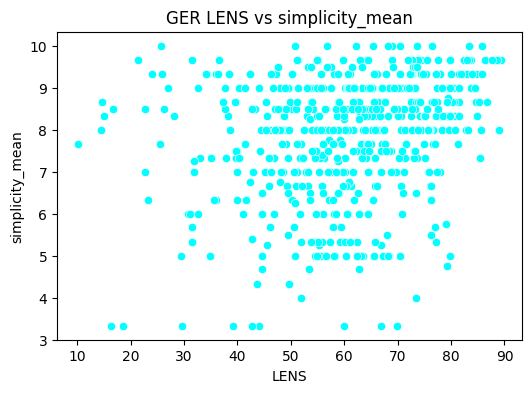

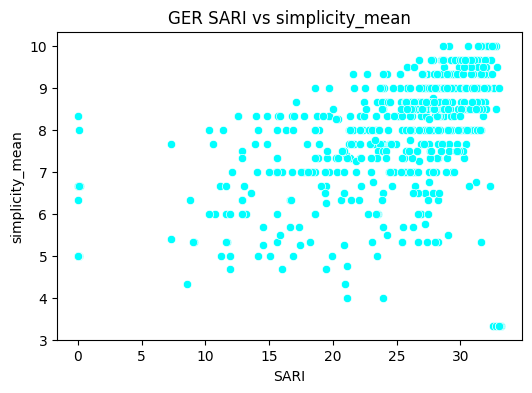

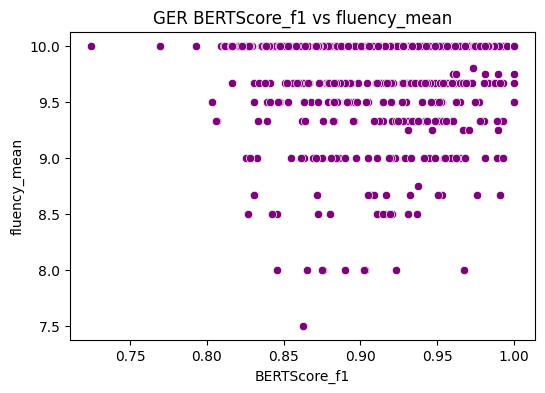

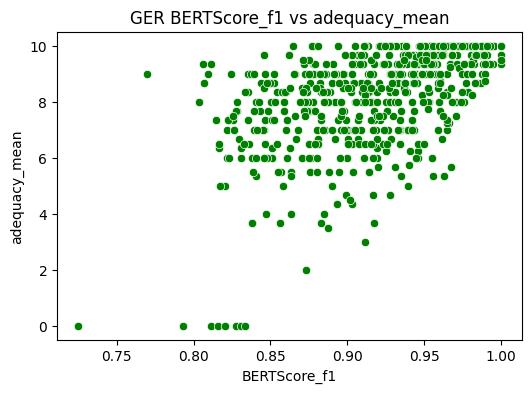

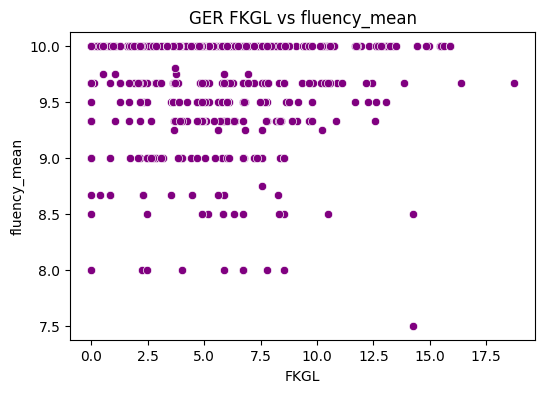

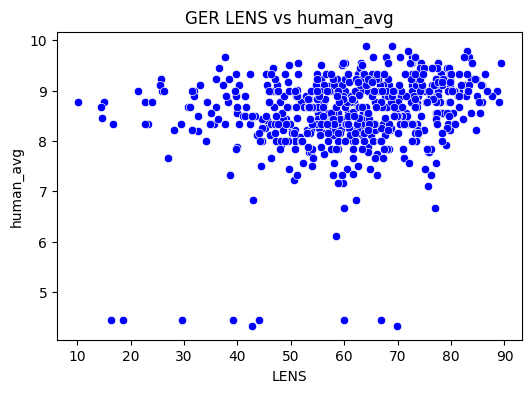

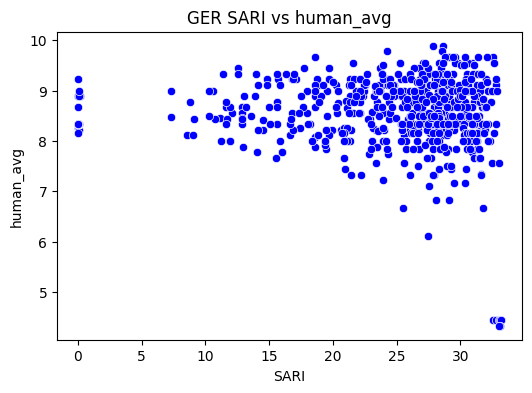

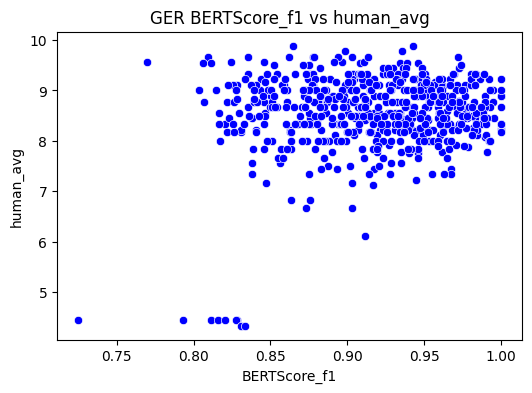

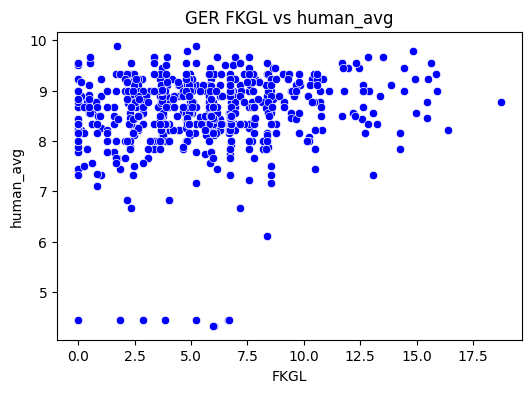

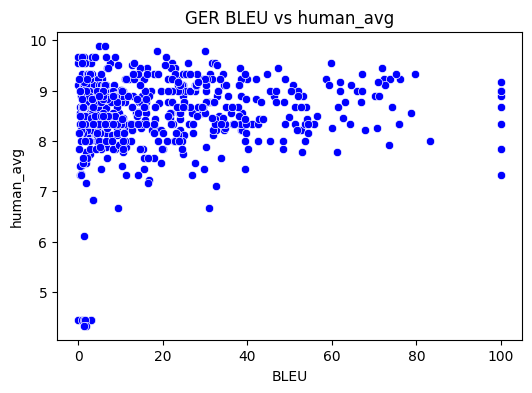

In [691]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate the human_avg column
final_df_human['human_avg'] = final_df_human[['fluency_mean', 'adequacy_mean', 'simplicity_mean']].mean(axis=1)

# Step 2: Generate the correlation matrix for automatic vs. human metrics
automatic_metrics = ['LENS', 'SARI', 'BERTScore_f1', 'FKGL', 'BLEU']
human_eval_metrics = ['human_avg', 'fluency_mean', 'adequacy_mean', 'simplicity_mean']

for language in languages:

    language_df = final_df_human[final_df_human["language"] == language]

    print("language_df for ", language)
    print(language_df["language"].value_counts())
    
    # Compute correlations between automatic metrics and human evaluation metrics
    selected_corr_matrix = language_df[automatic_metrics + human_eval_metrics].corr().loc[automatic_metrics, human_eval_metrics]

    
    # Plot the adjusted correlation matrix as a heatmap
    matrix_fig = plt.figure(figsize=(12, 8))
    sns.heatmap(selected_corr_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)
    matrix_title = f"{language.} Correlation Matrix: Automatic Metrics vs Human Ratings"
    plt.title(matrix_title)
    plt.xlabel("Human Ratings")
    plt.ylabel("Automatic Metrics")
    matrix_fig.savefig("figures/CorrM_"+language+"_Auto_vs_Human.png")
    plt.show()
    
    # Step 3: Create scatter plots for each specified pair with different colors for human metrics
    
    # Define the pairs of metrics to plot and their color mappings
    scatter_pairs = {
        ('LENS', 'fluency_mean'): 'purple',
        ('LENS', 'adequacy_mean'): 'green',
        ('LENS', 'simplicity_mean'): 'cyan',
        ('SARI', 'simplicity_mean'): 'cyan',
        ('BERTScore_f1', 'fluency_mean'): 'purple',
        ('BERTScore_f1', 'adequacy_mean'): 'green',
        ('FKGL', 'fluency_mean'): 'purple',
        ('LENS', 'human_avg'): 'blue',
        ('SARI', 'human_avg'): 'blue',
        ('BERTScore_f1', 'human_avg'): 'blue',
        ('FKGL', 'human_avg'): 'blue',
        ('BLEU', 'human_avg'): 'blue'
    }
    
    # Generate individual scatter plots
    for (auto_metric, human_metric), color in scatter_pairs.items():
        scatter_fig = plt.figure(figsize=(6, 4))
        sns.scatterplot(x=final_df_human[auto_metric], y=final_df_human[human_metric], color=color)
        title = f"{language.upper()} {auto_metric} vs {human_metric}"
        plt.title(title)
        plt.xlabel(auto_metric)
        plt.ylabel(human_metric)
        filename = "figures/ScatP_"+title+".png"
        scatter_fig.savefig(filename)
        plt.show()


In [692]:
full_corr_matrix = final_df_human[automatic_metrics + human_eval_metrics].corr().loc[automatic_metrics, human_eval_metrics]
full_corr_matrix


human_avg  fluency_mean  adequacy_mean  simplicity_mean
LENS              0.137         0.154          0.074            0.112
SARI             -0.248        -0.149         -0.485            0.330
BERTScore_f1      0.679        -0.041          0.764            0.134
FKGL              0.041        -0.044          0.010            0.077
BLEU              0.144         0.067          0.243           -0.124